#### Die Platzierung der Kommentarzeilen

In [1]:
# Kommentarzeilen oberhalb des Codestatements kommentieren das Ziel der nachfolgenden Operation
# Zeilen unterhalb des Codestatements kommentieren den Output dieser Operation

# Beispiel:

# Was is die Summe von 2 und 4?
2+4
# Die Summe ist 6

6

#### Modulimporte und allgemeine Einstellungen

In [2]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Verhindere Spaltenquetschung bei der Tabellenansicht
# D.h. zeige alle Spalten ohne Einschränkung
pd.options.display.max_columns = None 

# Setze die Dezimalstellenlänge der Zahlen auf 2 Nachkommastellen
pd.set_option('display.precision', 2)

### Datensatz Beschreibung
(Whatsapp selektive Screenshots)

![](Datenart.png)
![](Details1.png)
![](Details2.png)
![](FeatureBeschreibung.png)
![](Orte.png)

Die Luft ist ein Gemisch verschiedener Gase. Eines dieser Gase ist der Wasserdampf. Die Menge an Wasserdampf, die in der Luft enthalten sein kann, ist allerdings begrenzt. Je wärmer die Luft ist, desto mehr Wasserdampf kann in ihr enthalten sein. 
 - **T** - Temperatur in °C

 - **RH (Relative Humidity)** - Relative Feuchtigkeit gibt an, wie viel % des maximalen Wasserdampfgehaltes die Luft im Augenblick enthält. Da der maximale Wasserdampfgehalt mit steigender Temperatur ansteigt, fällt die relative Luftfeuchtigkeit mit steigender Temperatur (und umgekehrt). Ideal für das Innenraumklima ist eine relative Luftfeuchtigkeit von 40 bis 60 Prozent. Dann ist die Luft nicht zu trocken, um zum Beispiel die Schleimhäute auszutrocknen und Atemwegserkrankungen zu verursachen. Sie ist auch nicht zu feucht, denn eine erhöhte Luftfeuchtigkeit begünstigt die Bildung von Schimmel. Und da kommt der Taupunkt ins Spiel.

 - **DEW** - Taupunkt in °C. Die Taupunkttemperatur ist definiert als die Temperatur, bei der der aktuelle Wasserdampfgehalt in der Luft der maximale (100% relative Luftfeuchtigkeit) ist. Oder anders: Der Taupunkt ist der Wert, bis zu welchem die Temperatur fallen muss, damit sich Tau bildet. Denn dann kann die Luft den Wasserdampf nicht mehr halten. Dadurch kommt es zum Übergang vom gasförmigen in den flüssigen Zustand des Wasserdampfs (Kondensation), der sich anschließend an Gegenständen in Form von kleinsten Wassertröpfchen niederschlägt. Diese Wassertröpfchen werden als Tau bezeichnet. Bilden sich die Wassertröpfchen durch Kondensation nicht an Oberflächen, sondern in der Luft, so spricht man von Dunst oder Nebel.
 
**Wann die Temperatur den Taupunkt unterschreitet ist nützlich zu wissen für alle Mieter und Wohnungseigentümer, die Schimmel vorbeugen wollen, denn Tau bietet gute Bedingungen für Schimmelbefall.** 
 
Die Taupunkttemperatur ist eine von der aktuellen Temperatur unabhängige Größe.
    
Es gibt keine exakten Formel zur Umrechnung der Taupunkttemperatur in die relative Luftfeuchtigkeit.

Quellen: 
 - https://www.wetterochs.de/wetter/feuchte.html
 - https://www.schimmelprotektor.de/blog/wenn-der-taupunkt-unterschritten-wird/

<br>



<br>

In [3]:
# Lies den Datensatz ein und trenne die Werte zwischen den Spalten anhand der Semicolon
# Verweigere pandas die Nutzung der ersten Spalte als Index, weil es sonst die Überschriften und
# Werte durcheinanderbringt.
df = pd.read_csv('KlimaLoggPro.csv', sep=';', index_col=False)

In [4]:
# Kleine Vorschau vom Beginn der Aufzeichunungen im Januar 2010, die ersten 3 Messungen
df.head(3)

,Timestamp,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,T5,RH5,DEW5,T6,RH6,DEW6,T7,RH7,DEW7,T8,RH8,DEW8
0,2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4,---,---,---,---,---,---,---,---,---,---,---,---
1,2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3,---,---,---,---,---,---,---,---,---,---,---,---
2,2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9,---,---,---,---,---,---,---,---,---,---,---,---


In [5]:
# Die letzten 3 Messungen im Januar 2019
df.tail(3)

,Timestamp,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,T5,RH5,DEW5,T6,RH6,DEW6,T7,RH7,DEW7,T8,RH8,DEW8
48198,2019-01-24 18:45:00,19.8,53,10.0,20.6,54,11.0,19.9,56,10.9,21.8,48,10.3,19.9,55,10.6,21.0,48,9.6,21.1,47,9.4,18.8,52,8.8,---,---,---
48199,2019-01-24 19:00:00,19.4,53,9.6,20.6,54,11.0,19.9,56,10.9,21.9,48,10.4,20.0,55,10.7,20.9,48,9.5,21.1,48,9.7,18.9,53,9.1,---,---,---
48200,2019-01-24 19:15:00,19.4,53,9.6,20.7,54,11.1,19.9,56,10.9,21.9,48,10.4,20.0,55,10.7,20.9,48,9.5,21.1,48,9.7,18.9,53,9.1,---,---,---


### Was direkt auffällt ist die Diskrepanz zwischen der Datensatzbeschreibung, in der von "einem Jahr" die Rede ist und dem Datensatzintervall zwischen 2010 - 2019


### .... aber der Reihe nach.

In [6]:
# Setze den Timestamp als neuen Index für das DataFrame ein und zwar fest, also 'inplace'
df.set_index('Timestamp', inplace=True)
df.head(3)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,T5,RH5,DEW5,T6,RH6,DEW6,T7,RH7,DEW7,T8,RH8,DEW8
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4,---,---,---,---,---,---,---,---,---,---,---,---
2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3,---,---,---,---,---,---,---,---,---,---,---,---
2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9,---,---,---,---,---,---,---,---,---,---,---,---


In [7]:
print('\n\nDie Tabelle hat insgesamt',df.shape[0],'Zeilen und', df.shape[1],'Spalten')



Die Tabelle hat insgesamt 48201 Zeilen und 27 Spalten


In [8]:
# Welche Spalten sind komplett leer? (Wenn es solche geben sollte)
for col in df.columns:
    if df[str(col)].isna().sum() == df.shape[0]:
        print('\n\nSpalte',col,'hat keine Einträge\n')
        

# Kein Output bedeutet: es gibt keine komplett leeren Spalten

In [9]:
# Gibt es sporadische Lücken in Spalten, also nicht vorhandene Messungen? 
# Mit anderen Worten Null oder NaN Einträge?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48201 entries, 2010-01-01 00:15:00 to 2019-01-24 19:15:00
Data columns (total 27 columns):
TI      48201 non-null float64
RHI     48201 non-null int64
DEWI    48201 non-null float64
T1      48201 non-null float64
RH1     48201 non-null int64
DEW1    48201 non-null float64
T2      48201 non-null float64
RH2     48201 non-null int64
DEW2    48201 non-null float64
T3      48201 non-null object
RH3     48201 non-null object
DEW3    48201 non-null object
T4      48201 non-null float64
RH4     48201 non-null int64
DEW4    48201 non-null float64
T5      48201 non-null object
RH5     48201 non-null object
DEW5    48201 non-null object
T6      48201 non-null object
RH6     48201 non-null object
DEW6    48201 non-null object
T7      48201 non-null object
RH7     48201 non-null object
DEW7    48201 non-null object
T8      48201 non-null object
RH8     48201 non-null object
DEW8    48201 non-null object
dtypes: float64(8), int64(4), object(15)
memory us

**Auf den ersten Blick** scheint jede Spalte genauso viele nichtleere Einträge zu haben, wie 
die Tabelle an Reihen hat. Nämlich 48201.

**Da wir für sämtliche Messungen aber Zahleneinträge erwarten**, fallen drei Spalten **T3**, **RH3** und **DEW3**, 
sowie alle **Spalten ab T5** auf, da sie dem gemischten Datentyp 'object' entsprechen.
Bei näherer Betrachtung sieht man bereits in der Vorschau zu Beginn, dass gerade die hinteren Spalten sehr viele String Einträge '---' enthalten, die nicht als 'Nulls' von Pandas erkannt werden. 
Zudem heißt es in der Datensatzbeschreibung, dass mit der Zeit mehrere Sensoren dazugekommen sind, die
lediglich *"8 Tage"* an Messungen enthalten.

**Es gilt herauszufinden, welche Sensoren wieviele verwertbare Messungen enthalten, und was wir anschließend ignorieren können.** 


In [10]:
# Kovertiere alle Zellen mit '---' Strings zu Null Werten (in der Tabelle als NaN gekennzeichnet)
for col in df.columns:
    df[str(col)].replace(['---'], np.nan, inplace=True)

In [11]:
df.head(3)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,T5,RH5,DEW5,T6,RH6,DEW6,T7,RH7,DEW7,T8,RH8,DEW8
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Wieviele NICHT-Null Einträge gibt es jetzt pro Spalte?
df.notna().sum()
# Es gibt also nur 8 Messzeitpunkte (nicht "Tage", wie es in der Datensatzbeschreibung steht) für manche 
# Sensoren und noch weniger für die übrigen. Diese Spalten können wir aus der Tabelle rausnehmen.

TI      48201
RHI     48201
DEWI    48201
T1      48201
RH1     48201
DEW1    48201
T2      48201
RH2     48201
DEW2    48201
T3      48191
RH3     48191
DEW3    48191
T4      48201
RH4     48201
DEW4    48201
T5          8
RH5         8
DEW5        8
T6          7
RH6         7
DEW6        7
T7          7
RH7         7
DEW7        7
T8          0
RH8         0
DEW8        0
dtype: int64

Diese Übersicht gibt uns noch 2 weitere Auskünfte
1. Wie erwartet hat sich die Anzahl der Nicht-Null Einträge der anderen 3 'object' Spalten **T3**, **RH3** und **DEW3** verringert, d.h. auch sie enthielten '---' Strings an einigen wenigen Stellen.
2. Wir können uns sicher sein, dass die 8 (und weniger) Messungen pro Spalte tatsächlich die einzigen sind
die echte Zahlen enthalten, da gemischte Einträge wie '---56' oder '16---' von der obigen Konvertierung 
in Nulls nicht angetastet worden wären. 
Zum Glück enthält dieser Datensatz keine solcher unglücklich formatierten Einträge, da laut .info() Methode
nur noch reine float- und int Spalten übrig sind.

In [13]:
# Lösche sämtliche Spalten ab T5, bis einschließlich DEW8
columns_to_drop = df.columns[15:]
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df.head(3)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4
2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3
2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9


In [15]:
# Es bleiben jedoch noch die Messungen des Raumes 3 - Abstellkeller, die fehlende Einträge aufweisen

# Zeige diesmal Anzahl aller Null Einträge pro Spalte
df.isna().sum()
# Davon gibt es noch insgesamt 30

TI       0
RHI      0
DEWI     0
T1       0
RH1      0
DEW1     0
T2       0
RH2      0
DEW2     0
T3      10
RH3     10
DEW3    10
T4       0
RH4      0
DEW4     0
dtype: int64

In [16]:
# Zeige den Gesamtausschnitt der Tabelle, wo diese Messungen fehlen und zwar für Spalte T3
df[df.T3.isna()]
# Wie erwartet sind auch die anderen 2 Messgrößen RH3 und DEW3 zu denselben
# Zeitpunkten ausgefallen, da alle 3 Messgrößen: Temperatur, Luftfeuchtigkeit und Taupunkt 
# durch einen Sensor erfasst werden.

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2018-02-18 12:30:00,20.9,56,11.8,20.5,63,13.2,18.7,63,11.5,NaN,NaN,NaN,19.1,62,11.7
2018-02-22 01:15:00,20.5,54,10.9,20.7,58,12.2,18.7,61,11.1,NaN,NaN,NaN,19.1,61,11.4
2018-02-22 01:30:00,20.5,54,10.9,20.7,59,12.4,18.7,61,11.1,NaN,NaN,NaN,19.1,61,11.4
2018-02-22 01:45:00,20.4,54,10.8,20.7,59,12.4,18.7,61,11.1,NaN,NaN,NaN,19.0,61,11.3
2018-02-22 02:00:00,20.4,54,10.8,20.7,59,12.4,18.7,61,11.1,NaN,NaN,NaN,19.1,61,11.4
2018-02-22 02:15:00,20.4,54,10.8,20.7,59,12.4,18.6,61,11.0,NaN,NaN,NaN,19.0,61,11.3
2018-09-17 17:30:00,21.1,53,11.2,22.8,53,12.8,18.7,71,13.4,NaN,NaN,NaN,18.6,73,13.7
2018-09-17 17:45:00,21.0,53,11.1,22.3,54,12.6,18.7,72,13.6,NaN,NaN,NaN,18.6,73,13.7
2018-09-17 18:00:00,21.0,52,10.8,21.9,55,12.5,18.7,72,13.6,NaN,NaN,NaN,18.6,73,13.7


In [17]:
# Konvertiere den Timestamp, also den Datentyp des Index um.
# Mit anderen Worten: wandle die Strings in das spezielle Datetime Format um, 
# damit nützliche Funktionen und Berechnungen verfügbar werden und 
# Diagramme, sowie Plots leichter erstellt werden können.
df.index = pd.to_datetime(df.index)

In [18]:
# Damit können wir die Wochentage der 30 fehlenden Messungen anzeigen
# um ggf. eine Ursache für den Ausfall der Messungen zu ergründen.
Nan_only = df[df.T3.isna()].copy()
Nan_only = Nan_only.iloc[:,-6:-3]
Nan_only['Wochentag'] = Nan_only.index.weekday_name
Nan_only
# Es sind also speziell 3 Kalendertage gewesen, an denen der Sensor3 ausgefallen ist.
# Alle 3 Tage waren im Jahr 2018: 
# Am 18ten Februar (Mittags), vier Tage später am 22 Februar (Nachts) und am 17 September (Abends)

,T3,RH3,DEW3,Wochentag
Timestamp,,,,
2018-02-18 12:30:00,NaN,NaN,NaN,Sunday
2018-02-22 01:15:00,NaN,NaN,NaN,Thursday
2018-02-22 01:30:00,NaN,NaN,NaN,Thursday
2018-02-22 01:45:00,NaN,NaN,NaN,Thursday
2018-02-22 02:00:00,NaN,NaN,NaN,Thursday
2018-02-22 02:15:00,NaN,NaN,NaN,Thursday
2018-09-17 17:30:00,NaN,NaN,NaN,Monday
2018-09-17 17:45:00,NaN,NaN,NaN,Monday
2018-09-17 18:00:00,NaN,NaN,NaN,Monday


###### Da pandas NaN Werte bei mathematischen Operationen ignoriert, können wir sie zunächst unverändert im Datensatz behalten.

### Kehren wir zur Gesamttabelle zurück

In [19]:
df.head(3)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4
2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3
2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9


In der Beschreibung heißt es, dass die Messungen alle 15 Minuten durchgeführt werden und zwar 24/7 (Annahme). Da aber jede Viertel Stunde (alle 15 Minuten) eine Messung durchgeführt wird, werden wir pro Tag ca. 96 (4 * 24) Messungen haben. Und im Laufe von mindestens 9 Jahren (2010 - 2019) müssten es 315648 (3288 * 96) Messungen sein... Wir haben aber lediglich 48201 Messungen... oder ca. 1,4 Jahre... 

Zudem heißt es in der Datensatzbeschreibung, dass lediglich 1 Jahr an Messungen vorhanden ist... jedoch fängt der Datensatz bei 2010 an und hört in 2019 auf... **wo liegt also der Fehler?**

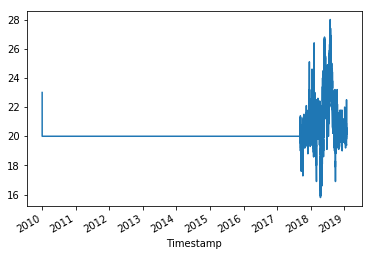

In [20]:
# Ein schneller Plot der Temperatur im Flur offenbart,
df.TI.plot();
# dass ganz offensichtlich etwas mit den Werten der Jahre 2010 bis ca. Mitte 2017 nicht stimmt.

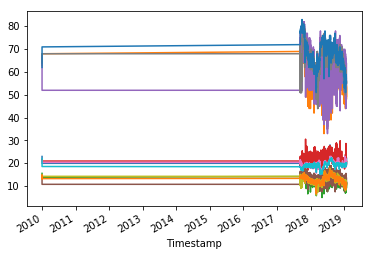

In [21]:
df.plot(legend=False);

# Genauso verhält es sich mit den restlichen Sensoren (hier farblich unterschieden)
# Entweder sind die Sensoren über Jahre hinweg falsch eingestellt gewesen und
# haben alle unentdeckt den jeweils gleichen Wert gemessen...

In [22]:
# Oder, und was wahrscheinlicher ist,
df.head(10)
# besteht der Datensatz aus irreführenden Zeitangaben,
# wie hier beim Sprung vom 1.1.2010 direkt zum 9.9.2017 gut zu sehen ist. (Siehe unterste 3 Timestamps)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4
2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3
2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9
2010-01-01 01:00:00,20.8,67,14.5,21.5,55,12.1,20.9,67,14.6,19.8,66,13.3,19.9,66,13.4
2010-01-01 01:15:00,20.3,67,14.0,21.2,53,11.3,20.6,67,14.3,19.0,68,13.0,19.0,69,13.2
2010-01-01 01:30:00,20.1,68,14.0,21.2,53,11.3,20.4,68,14.3,18.7,70,13.1,18.7,70,13.1
2010-01-01 01:45:00,20.0,68,13.9,21.1,53,11.2,20.4,68,14.3,18.7,70,13.1,18.6,71,13.3
2010-01-01 02:00:00,20.0,68,13.9,21.0,52,10.8,20.4,68,14.3,18.6,71,13.3,18.6,71,13.3
2017-09-09 18:30:00,20.0,69,14.2,21.0,52,10.8,20.4,68,14.3,18.6,72,13.5,18.5,72,13.4


In [23]:
# Zeige alle Einträge aus dem Jahr 2010 an:
df[df.index.year == 2010]
# Das ist alles was 2010 an Messungen zu bieten hat --> bloß 8 Zeitpunkte

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2010-01-01 00:15:00,23.0,63,15.6,21.3,64,14.2,21.3,64,14.2,22.4,62,14.8,22.0,62,14.4
2010-01-01 00:30:00,21.7,64,14.6,20.8,66,14.2,21.1,66,14.5,21.3,64,14.2,21.4,64,14.3
2010-01-01 00:45:00,21.0,66,14.4,21.3,67,15.0,21.3,67,15.0,21.9,64,14.8,21.5,66,14.9
2010-01-01 01:00:00,20.8,67,14.5,21.5,55,12.1,20.9,67,14.6,19.8,66,13.3,19.9,66,13.4
2010-01-01 01:15:00,20.3,67,14.0,21.2,53,11.3,20.6,67,14.3,19.0,68,13.0,19.0,69,13.2
2010-01-01 01:30:00,20.1,68,14.0,21.2,53,11.3,20.4,68,14.3,18.7,70,13.1,18.7,70,13.1
2010-01-01 01:45:00,20.0,68,13.9,21.1,53,11.2,20.4,68,14.3,18.7,70,13.1,18.6,71,13.3
2010-01-01 02:00:00,20.0,68,13.9,21.0,52,10.8,20.4,68,14.3,18.6,71,13.3,18.6,71,13.3


In [24]:
# Entferne die Einträge aus dem Jahr 2010, da diese nicht mal über eine 2 Stunden Spanne hinausgehen
# und somit statistisch uninterresant sind. Und ob sie tatsächlich von vor zehn Jahren gemacht wurden,
# oder ob ein Fehler vorliegt sei dahingestellt und nicht mehr von Belang
df = df[df.index.year != 2010]

In [25]:
# Die frühesten Messungen beginnen jetzt am 9.9.2017
df.head(3)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2017-09-09 18:30:00,20.0,69,14.2,21.0,52,10.8,20.4,68,14.3,18.6,72,13.5,18.5,72,13.4
2017-09-09 18:45:00,20.0,70,14.4,21.0,52,10.8,20.3,69,14.5,18.6,72,13.5,18.5,72,13.4
2017-09-09 19:00:00,20.0,69,14.2,21.0,52,10.8,20.3,70,14.7,18.6,73,13.7,18.5,73,13.6


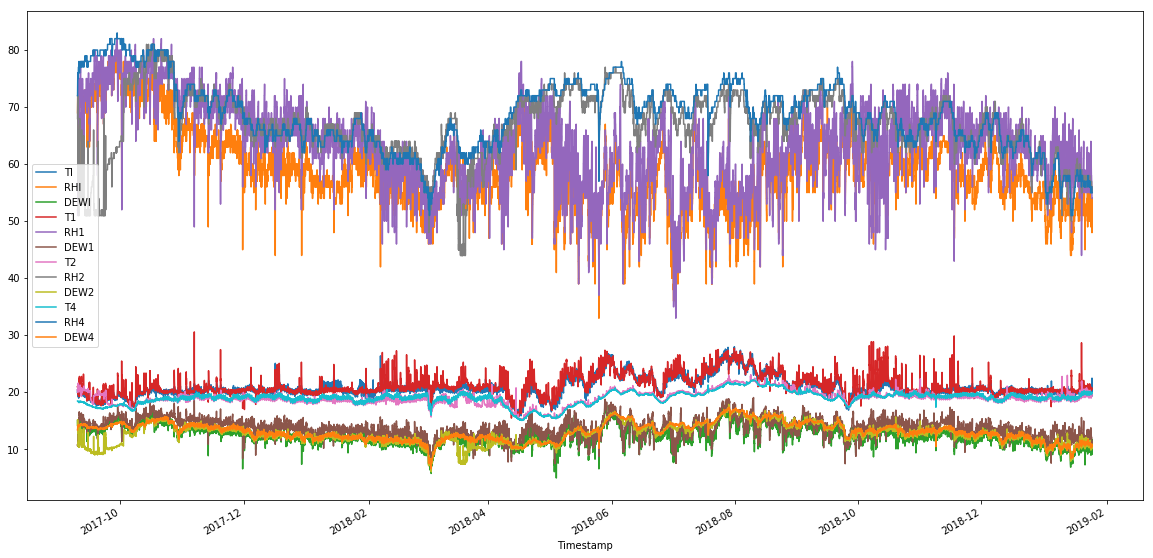

In [26]:
# Ein schneller Testplot ergibt
df.plot(figsize=(20,10));
# Das sieht schon besser aus.
# Bemerkung 1: Die völlig überzeichnete Darstellung rührt aus der Menge der Einzelmessungen in kurzen Abständen
# Bemerkung 2: Die Sensor3-Messungen fehlen gänzlich, da deren Spalten (noch) nicht vollständig sind

### Gibt es fehlerhafte Einträge (unnatürliche Ausreißer), die als solche nicht erkannt werden, weil sie richtig formatiert sind?

In [27]:
df.describe().loc[('min','max'),:]
# Nein, alle Werte scheinen innerhalb ihrer logischen Intervalle zu liegen.

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T4,RH4,DEW4
min,15.8,33.0,5.0,15.5,33.0,7.1,15.3,44.0,6.1,15.1,51.0,6.6
max,28.0,79.0,18.5,30.6,82.0,19.1,23.1,81.0,17.9,22.5,83.0,17.4


<br>

### Überprüfe den Datensatz auf Kontinuität. Lagen zwischen allen Messzeitpunkten immer 15 Minuten oder gab es Unregelmäßigkeiten?

Sind alle Sensoren nun rund um die Uhr gelaufen ohne jemals simultan ausgeschaltet gewesen zu sein? Das würde bedeuten, dass der Strom im Haus zu keinem Zeitpunkt ausgefallen ist und dass der Besitzer die Sensoren niemals (beabsichtigt oder unbeabsichtigt) ausgeschaltet hatte.

In [28]:
# Überprüfe, ob es jemals einen "Ausfall" gab, indem wir alle Zeitpunkte auflisten,
# an denen zwischen einem Messzeitpunkt und dem darauffolgenden NICHT EXAKT 15 Minuten lagen:

print('\n')

fünfzehn_min_delta = pd.Timedelta('0 days 00:15:00')
danach = 0

for jetzt in df.index: 
    if danach != 48192:
        danach += 1
        if (df.index[danach] - jetzt) != fünfzehn_min_delta:
            print('Delta: {}, zwischen'.format(df.index[danach] - jetzt))
            print(jetzt)
            print('und')
            print(df.index[danach])
            print('\n')



Delta: 0 days 01:15:00, zwischen
2018-03-25 02:00:00
und
2018-03-25 03:15:00


Delta: 0 days 00:10:00, zwischen
2019-01-24 17:45:00
und
2019-01-24 17:55:00


Delta: 0 days 00:05:00, zwischen
2019-01-24 17:55:00
und
2019-01-24 18:00:00




**Es gab also 3 Zeitabschnitte an denen die Messintervalle NICHT 15 Minuten betrugen. Sehen wir uns diese Zeitabschnitte an.**

In [29]:
# Zeitabschnitt 1: (Hier fehlen 1 Stunde und 15 Minuten oder "5 Reihen an Aufzeichnungen")
df.loc['2018-03-25 01:45:00':'2018-03-25 03:30:00',:]
# Die Einträge der vorhergehenden und der verspäteten Messung sind identisch. Wir könnten daraus schließen, 
# dass die Luftverhältnisse in dieser fehlenden Zeitspanne stabil geblieben waren.

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2018-03-25 01:45:00,20.3,56,11.3,20.5,57,11.7,18.2,61,10.6,17.8,66,11.4,18.7,63,11.5
2018-03-25 02:00:00,20.3,56,11.3,20.5,57,11.7,18.2,61,10.6,17.8,67,11.6,18.6,63,11.4
2018-03-25 03:15:00,20.3,56,11.3,20.5,57,11.7,18.2,61,10.6,17.8,67,11.6,18.6,63,11.4
2018-03-25 03:30:00,20.2,56,11.2,20.5,58,12.0,18.1,61,10.5,17.7,67,11.5,18.6,63,11.4


In [30]:
# Zeitabschnitt 2: (Hier gab es ein kürzeres Intervall, nämlich 10 Minuten)
df.loc['2019-01-24 17:45:00':'2019-01-24 18:00:00',:]
# Die Werte scheinen im Rahmen der Erwartungen zu liegen.

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2019-01-24 17:45:00,22.4,49,11.2,20.7,54,11.1,19.4,55,10.2,21.8,48,10.3,19.9,55,10.6
2019-01-24 17:55:00,21.9,48,10.4,20.7,54,11.1,19.4,55,10.2,21.8,47,10.0,19.9,55,10.6
2019-01-24 18:00:00,22.5,50,11.6,20.7,54,11.1,19.4,56,10.4,21.7,48,10.2,19.9,55,10.6


In [31]:
# Zeitabschnitt 3: (Das kürzeste Intervall betrug nur 5 Minuten zwischen den einzelnen Messungen)
df.loc['2019-01-24 17:45:00':'2019-01-24 18:00:00',:]
# Die Messungen scheinen ebenfalls in Ordnung zu sein ---> können wir behalten.

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2019-01-24 17:45:00,22.4,49,11.2,20.7,54,11.1,19.4,55,10.2,21.8,48,10.3,19.9,55,10.6
2019-01-24 17:55:00,21.9,48,10.4,20.7,54,11.1,19.4,55,10.2,21.8,47,10.0,19.9,55,10.6
2019-01-24 18:00:00,22.5,50,11.6,20.7,54,11.1,19.4,56,10.4,21.7,48,10.2,19.9,55,10.6


<br>

## Wie wir im ersten unregelmäßigen Abschnitt oben gesehen haben, waren die Einträge zwischen benachbarten Reihen identisch. Wieviele solcher Reihen gibt es?

In [32]:
# Sind sie aus einem technischen Fehler heraus entstanden oder zeigen sie nur stabile Verhältnisse auf?

# Zur Verdeutlichung was gemeint ist: 
# gibt es 2 (oder mehr) Reihen, bei denen alle Messungen, durch alle Sensoren hinweg 
# absolut identisch sind? (Beispiel: Reihe 1 = | '0' | '6' | '9' |
#                                    Reihe 2 = | '0' | '6' | '9' |. 
#                                    Reihen 1 und 2 bezeichne ich somit als "Zwillinge" oder "Duplikate")

# Dazu erhebe ich den Timestamp temporär vom Index zur Spalte, damit auch der Messzeitpunkt in den Vergleich
# miteinbezogen wird. Schließlich dürfen die Messungen nach Spalte gleich sein, wenn sich die Messgrößen naturbedingt
# nicht ändern. Wenn aber ein und derselbe MessZEITPUNKT mehrmals auftaucht, muss etwas kaputt sein.
df.reset_index().duplicated(subset=None).sum()

# Zum Glück ist das nicht der Fall

# (es hätte mich auch verwundert, schließlich haben wir bereits zuvor den Index nach unregelmäßigen
# Zeitdeltas gescannt)

0

In [33]:
# Schließen wir den Timestamp aus der Betrachtung aus, gibt es dann Duplikate? 
df.duplicated(subset=None).sum()
# Ja, ganze 6873 Reihen, die mindestens einen oder sogar mehr "Zwillingsgeschwister" haben.

6873

In [34]:
print('\n\nDas bedeutet es gibt insgesamt', df.loc[df.duplicated(subset=None, keep=False), :].shape[0],
      'Reihen im Datensatz die keine Unikate sind.')

print('Das entspricht einem Anteil von etwa', int(11961/df.shape[0]*100),'% des gesamten Datensatzes.')



Das bedeutet es gibt insgesamt 11961 Reihen im Datensatz die keine Unikate sind.
Das entspricht einem Anteil von etwa 24 % des gesamten Datensatzes.


In [35]:
# Wie sehen sie die Duplikate aus?
df.loc[df.duplicated(subset=None, keep=False), :].head(20)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
Timestamp,,,,,,,,,,,,,,,
2017-09-10 02:30:00,19.3,71,13.9,19.7,73,14.7,21.2,52,11.0,18.4,77,14.3,18.4,76,14.1
2017-09-10 02:45:00,19.3,71,13.9,19.7,73,14.7,21.2,52,11.0,18.4,77,14.3,18.4,76,14.1
2017-09-10 03:00:00,19.3,71,13.9,19.7,73,14.7,21.2,52,11.0,18.4,77,14.3,18.4,76,14.1
2017-09-10 06:00:00,19.1,72,14.0,19.4,74,14.7,21.0,52,10.8,18.3,78,14.4,18.3,77,14.2
2017-09-10 06:15:00,19.1,72,14.0,19.4,74,14.7,21.0,51,10.5,18.3,78,14.4,18.3,77,14.2
2017-09-10 06:30:00,19.1,72,14.0,19.4,74,14.7,21.0,51,10.5,18.3,78,14.4,18.3,77,14.2
2017-09-10 07:00:00,19.1,72,14.0,19.4,74,14.7,21.0,51,10.5,18.3,78,14.4,18.3,77,14.2
2017-09-10 07:15:00,19.1,72,14.0,19.4,74,14.7,21.0,52,10.8,18.3,78,14.4,18.3,77,14.2
2017-09-10 09:15:00,19.6,72,14.4,19.3,75,14.8,20.9,52,10.7,18.3,78,14.4,18.3,77,14.2


Wie intuitiv nicht anders zu erwarten, befindet sich die "Zwillinge" oder "Drillinge" etc. in unmittelbarer
 zeitlicher Nähe zueinander. (Im Abstand von 15 Minuten werden sich die häuslichen Luftverhältnisse nun mal
 nicht so schnell verändern, selbst wenn die Sensoren sehr feinjustiert sein sollten und die Messungen quer
 übers ganze Haus stattfinden. Dennoch ist es nicht völlig ausgeschlossen, dass sich die exakt gleichen Messungen über alle Sensoren hinweg, an unterschiedlichen Tagen oder sogar Jahreszeiten ereignen könnten.)
 
 ## Zu klärende Fragen:

 ### 1. Können wir die 30 noch fehlenden Messungen ruhigen Gewissens auffüllen? Womit genau?
Außerdem: Wo, wann und wie hoch waren die Temperaturextrema? Welches Zimmer war im Schnitt das wärmste? Welche Zimmertemperatur war "am stabilsten"?
 ### 2. Bestand Schimmelgefahr?
 ### 3. Zu welchen Tageszeiten waren die Luftverhältnisse am stabilsten und 
 ### 4. Können wir für besonders instabile Zeitabschnitte die menschliche Präsenz verantwortlich machen?
Also inwiefern die Tageszeiten eine Rolle für die Schwankungen spielen (Tagsüber sind Arbeitstätige nicht zu Haus,
 Abends schließen und öffnen sie die Fenster, schalten Geräte ein, kochen, waschen usw. Sind die Messungen deshalb an Wochenenden weniger stabil als an Arbeitstagen?)
 ### 5. Welche Einfluss hatten die Luftverhältnisse und die Temperatur außerhalb des Hauses? 
 
 
<br>

In [36]:
# Erstelle neue Spalten zur späteren Gruppierung
df['TagImJahr'] = df.index.dayofyear
df['WocheImJahr'] = df.index.weekofyear
df['Monat'] = df.index.month
df['Jahr'] = df.index.year

In [37]:
df.head(3)
# Beachte die neuen 4 Spalten am Ende, mit denen wir mehrfache Gruppierungen ausführen können:
# Z.B. eine (TagImJahr + Jahr)-Gruppierung stellt sicher, dass gleiche Kalendartage aus verschiedenen Jahren
# nicht aus Versehen in die gleiche Gruppe hineinkommen und unsere Einblicke somit verzerren würden!

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,TagImJahr,WocheImJahr,Monat,Jahr
Timestamp,,,,,,,,,,,,,,,,,,,
2017-09-09 18:30:00,20.0,69,14.2,21.0,52,10.8,20.4,68,14.3,18.6,72,13.5,18.5,72,13.4,252,36,9,2017
2017-09-09 18:45:00,20.0,70,14.4,21.0,52,10.8,20.3,69,14.5,18.6,72,13.5,18.5,72,13.4,252,36,9,2017
2017-09-09 19:00:00,20.0,69,14.2,21.0,52,10.8,20.3,70,14.7,18.6,73,13.7,18.5,73,13.6,252,36,9,2017


In [38]:
# Schauen wir uns die Temperaturverläufe der 4 Zimmer im Zeitverlauf an:
# (zunächst ohne Zimmer 3)

# Für einen weniger "zitterigen" Graphenverlauf und einen leichter erkennbaren Trend,
# plotten wir nur die Durchschnittstemperatur pro Woche für jedes Jahr der Aufzeichnungen
# Dazu gruppieren wir nach Woche + Jahr und sortieren erst nach der Woche, dann nach dem Jahr.

doppel_index_temp = df.groupby(['WocheImJahr','Jahr']).TI.mean().sort_index(level=1, sort_remaining=False)
doppel_index_temp

# Somit ergibt sich eine Serie aus zeitlich aufeinander korrekt abfolgenden Durchschnittsmessungen der Temperatur
# pro Woche, hier für den Flur. 

# Der Plotter hat jetzt nur noch 73 Einzelwerte darzustellen und 
# nicht mehr 48193 wie zuvor.

WocheImJahr  Jahr
36           2017    19.90
37           2017    19.31
38           2017    18.36
39           2017    19.26
40           2017    18.43
41           2017    20.04
42           2017    20.36
43           2017    20.12
44           2017    20.11
45           2017    20.45
46           2017    20.62
47           2017    20.26
48           2017    20.45
49           2017    20.49
50           2017    20.46
51           2017    20.70
52           2017    20.25
1            2018    20.11
2            2018    21.17
3            2018    20.76
4            2018    20.25
5            2018    19.77
6            2018    20.63
7            2018    20.67
8            2018    20.67
9            2018    20.10
10           2018    20.70
11           2018    20.56
12           2018    20.92
13           2018    20.60
                     ...  
27           2018    23.14
28           2018    21.77
29           2018    23.72
30           2018    25.87
31           2018    25.83
32        

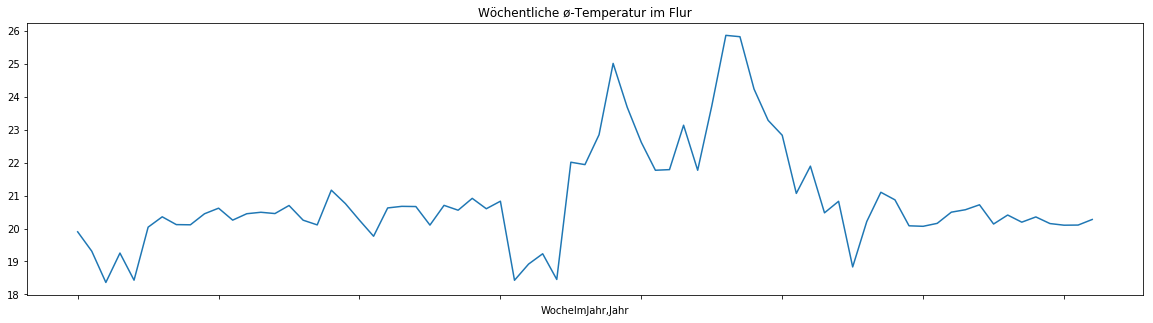

In [39]:
doppel_index_temp.plot(figsize=(20,5), title='Wöchentliche ø-Temperatur im Flur');
# Als ersten Einblick für den ungefähren Trend eignet sich diese Darstellung ganz gut
# Allerdings fehlen die detaillierten Übergänge und der Vergleich zu den anderen Räumen

<br>

#### Das nachfolgende kann übersprungen werden und veranschaulicht nur für mich interessante Methoden

In [40]:
# Speichere durchschnittliche Tages-Temperaturen für alle Räume (außer Raum 3)
tages_tempI = df.groupby(['TagImJahr','Jahr']).TI.mean().sort_index(level=1, sort_remaining=False)
tages_temp1 = df.groupby(['TagImJahr','Jahr']).T1.mean().sort_index(level=1, sort_remaining=False)
tages_temp2 = df.groupby(['TagImJahr','Jahr']).T2.mean().sort_index(level=1, sort_remaining=False)
tages_temp4 = df.groupby(['TagImJahr','Jahr']).T4.mean().sort_index(level=1, sort_remaining=False)

In [41]:
# Wieviele Monate stehen im Zeitraum der Betrachtung?
df.groupby(['Monat','Jahr']).TI.mean().sort_index(level=1, sort_remaining=False)
# 17

Monat  Jahr
9      2017    19.01
10     2017    19.75
11     2017    20.38
12     2017    20.49
1      2018    20.50
2      2018    20.54
3      2018    20.54
4      2018    19.38
5      2018    21.92
6      2018    22.65
7      2018    23.78
8      2018    23.42
9      2018    20.55
10     2018    20.50
11     2018    20.43
12     2018    20.31
1      2019    20.14
Name: TI, dtype: float64

In [42]:
# Erstelle entsprechendes dictionary für die Monatsbezeichnungen
monat_dic = {1:'Januar', 2:'Februar', 3:'März', 4:'April', 5:'Mai', 6:'Juni',
            7:'Juli', 8:'August', 9:'September', 10:'Oktober', 11:'November', 12:'Dezember'}

In [43]:
# Gib den Monatsnummern ihre Namen
df['Monat'] = df.Monat.map(monat_dic)

In [44]:
df.head(3)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,TagImJahr,WocheImJahr,Monat,Jahr
Timestamp,,,,,,,,,,,,,,,,,,,
2017-09-09 18:30:00,20.0,69,14.2,21.0,52,10.8,20.4,68,14.3,18.6,72,13.5,18.5,72,13.4,252,36,September,2017
2017-09-09 18:45:00,20.0,70,14.4,21.0,52,10.8,20.3,69,14.5,18.6,72,13.5,18.5,72,13.4,252,36,September,2017
2017-09-09 19:00:00,20.0,69,14.2,21.0,52,10.8,20.3,70,14.7,18.6,73,13.7,18.5,73,13.6,252,36,September,2017


#### Ende des optionalen Abschnitts
<br>

In [45]:
# Lösche wieder die letzten 4 Spalten
df.drop(columns=['TagImJahr', 'WocheImJahr', 'Monat', 'Jahr'], inplace=True)

In [46]:
# Gruppiere gesamte Tabelle nach dem Kalenderdatum und berechne den Durchschnitt 
# für jede Spalte pro Kalenderdatum.
# Stelle das Ergebnis in neuer Tabelle dar: 'datum_df'
datum_df = df.groupby(df.index.date).mean()
# Gib dem Index der neuen Tabelle sogleich das datetime Format
datum_df.index = pd.to_datetime(datum_df.index)

# Damit "klappen" wir die Tabelle in Ihre Tagesbestandteile "ein". 
# Und aus 96 Messungen pro Tag wird eine einzige

datum_df.head()
# Die ersten 5 Zeilen (jede Zeile entspricht jetzt einem Kalendartag/Datum)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T4,RH4,DEW4
2017-09-09,19.95,69.73,14.26,20.55,58.91,12.14,20.69,66.95,14.31,18.50,74.64,13.93
2017-09-10,19.89,71.34,14.57,20.34,72.26,15.20,20.83,58.51,12.32,18.36,76.57,14.17
2017-09-11,20.08,70.81,14.63,20.69,72.16,15.50,20.19,56.26,11.20,18.34,77.53,14.35
2017-09-12,19.95,68.96,14.08,20.64,69.11,14.77,20.50,54.02,10.87,18.29,77.84,14.36
2017-09-13,19.51,71.12,14.14,19.86,71.97,14.66,20.45,52.34,10.36,18.15,78.23,14.29


In [47]:
# Finde die Positionen in der Tabelle bei denen der Monat wechselt,
# Oder anders gefragt: Wieviele Tage haben die einzelnen Monate gehabt?
# Damit können wir für das kommende Diagramm die Position der Monatsabschnitte auf der x-Achse festlegen.

summe = 0
positionsliste = [-9] # Position für den unvollständigen ersten Monat (uns fehlen die ersten 9 Tage)
m = 9

for month in datum_df.index.month:
    if m == month:
        summe += 1
    else:
        positionsliste.append(summe)
        summe += 1
        m = month
        
positionsliste.append(len(datum_df) + 7) # Position für den unvollständigen letzten Monat
print(positionsliste)

[-9, 22, 53, 83, 114, 145, 173, 204, 234, 265, 295, 326, 357, 387, 418, 448, 479, 510]


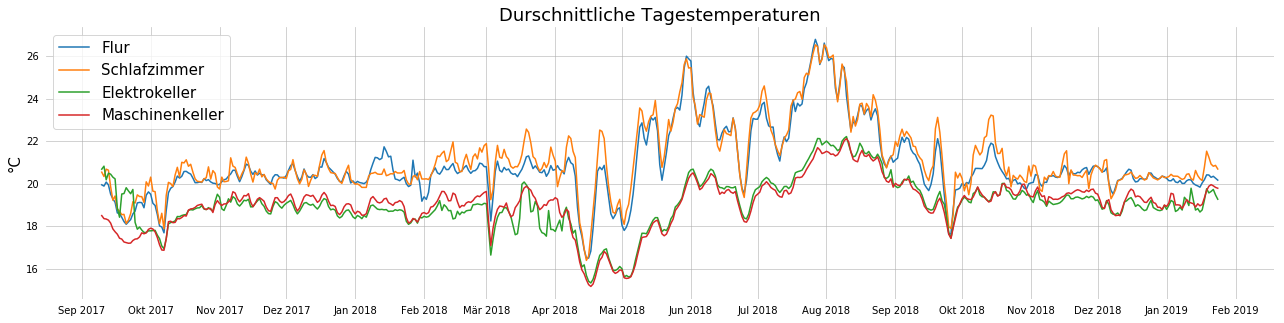

In [48]:
# Plotte die durchschnittlichen Tages-Temperaturen und zeige alle Räume im Verhältnis zueinander
plt.figure(figsize=(22,5))

plt.plot(np.arange(len(datum_df)), datum_df.TI) # Tagestemperaturen
plt.plot(np.arange(len(datum_df)), datum_df.T1)
plt.plot(np.arange(len(datum_df)), datum_df.T2)
plt.plot(np.arange(len(datum_df)), datum_df.T4)
plt.xticks(positionsliste, 
           ['Sep 2017','Okt 2017','Nov 2017','Dez 2017','Jan 2018','Feb 2018','Mär 2018',
           'Apr 2018','Mai 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Okt 2018',
           'Nov 2018','Dez 2018','Jan 2019', 'Feb 2019']) # Monatsticks
plt.ylabel('°C', fontsize=15)

plt.title('Durschnittliche Tagestemperaturen',
         fontsize= 18)

plt.legend(loc='upper left', fontsize=15, 
           labels=['Flur','Schlafzimmer', 'Elektrokeller','Maschinenkeller'])

# Entferne den schwarzen Rahmen und mach die Grafik hübscher
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False, left=False)
plt.grid(alpha = 0.7)

plt.show()

In dem obigen Diagramm lassen sich folgende Beobachtungen machen:

1. Die Temperaturen der beiden Zimmer im Erdgeschoss (Flur und Schlafzimmer) gehen stets Hand in Hand, sowie die
Temperaturen der 2 Kellerräume (Elektrokeller und Maschinenkeller)
2. Der Temperaturunterschied zwischen den Stockwerken beträgt durchs Jahr hinweg ungefähr 2°C, wobei er
im Frühling und Sommer größer wird.
3. Zudem schwankt die Temperatur im Frühling und Sommer viel stärker als in der restlichen Jahreszeit

Diese vergleichsweise starken Schwankungen ab April über den ganzen Sommer hinweg könnten ein Indiz dafür sein,
dass die Besitzer ab diesem Zeitpunkt die Heizung ausstellen und auf sommerliche Temperaturen spekulieren. 
Diese kommen dann auch, gehen aber auch wieder, wie es ihnen beliebt. Der größere Temperaturunterschied zwischen
"Erdgeschoss" und "Keller" im Sommer ist ein weiteres Indiz dafür, dass nur die Sonne und die Außenluft die Wärme
im Haus regulieren und nicht die Heizung.

<br>

# Widmen wir uns Frage Nr.1: Was machen wir mit den fehlenden Messungen?

In [49]:
# Zeige den Ausschnitt unmittelbar vor, während und nach den fehlenden Messungen des Sensors 3 
# für jeden der 3 Tage an denen der Sensor ausfiel.

# 2 Februar 2018:
df.loc['2018-02-18 12:00:00':'2018-02-18 13:00:00',['T3','RH3','DEW3']]

,T3,RH3,DEW3
Timestamp,,,
2018-02-18 12:00:00,20.4,58,11.9
2018-02-18 12:15:00,20.3,58,11.8
2018-02-18 12:30:00,NaN,NaN,NaN
2018-02-18 12:45:00,20.3,58,11.8
2018-02-18 13:00:00,20.3,58,11.8


In [50]:
# 22 Februar 2018:
df.loc['2018-02-22 00:45:00':'2018-02-22 02:45:00', ['T3','RH3','DEW3']]

,T3,RH3,DEW3
Timestamp,,,
2018-02-22 00:45:00,19.7,59,11.5
2018-02-22 01:00:00,19.7,60,11.7
2018-02-22 01:15:00,NaN,NaN,NaN
2018-02-22 01:30:00,NaN,NaN,NaN
2018-02-22 01:45:00,NaN,NaN,NaN
2018-02-22 02:00:00,NaN,NaN,NaN
2018-02-22 02:15:00,NaN,NaN,NaN
2018-02-22 02:30:00,19.6,60,11.6
2018-02-22 02:45:00,19.6,60,11.6


In [51]:
# 17 September 2018:
df.loc['2018-09-17 17:00:00':'2018-09-17 18:45:00', ['T3','RH3','DEW3']]

,T3,RH3,DEW3
Timestamp,,,
2018-09-17 17:00:00,18.4,73,13.5
2018-09-17 17:15:00,18.4,73,13.5
2018-09-17 17:30:00,NaN,NaN,NaN
2018-09-17 17:45:00,NaN,NaN,NaN
2018-09-17 18:00:00,NaN,NaN,NaN
2018-09-17 18:15:00,NaN,NaN,NaN
2018-09-17 18:30:00,18.4,73,13.5
2018-09-17 18:45:00,18.4,73,13.5


### Der Umstand, dass es sich bei dem größten fehlenden Abschnitt um nicht mehr als 5.3% der Tagesmessungen handelt und so gut wie keine Schwankungen unmittelbar davor und danach stattfinden und darüber hinaus die Werte der anderen Sensoren zu diesen Zeitpunkten intakt sind, gibt uns die hinreichende Begründung die fehlenden Einträge einfach mit den Werten der ersten nachkommenden gültigen Messungen zu füllen.

In [52]:
df.fillna(method = 'bfill', inplace=True)
df.loc['2018-09-17 17:00:00':'2018-09-17 18:45:00', ['T3','RH3','DEW3']]
# Hier als Beispiel der jetzt vollständige 17 September

,T3,RH3,DEW3
Timestamp,,,
2018-09-17 17:00:00,18.4,73,13.5
2018-09-17 17:15:00,18.4,73,13.5
2018-09-17 17:30:00,18.4,73,13.5
2018-09-17 17:45:00,18.4,73,13.5
2018-09-17 18:00:00,18.4,73,13.5
2018-09-17 18:15:00,18.4,73,13.5
2018-09-17 18:30:00,18.4,73,13.5
2018-09-17 18:45:00,18.4,73,13.5


In [53]:
df.isna().sum()
# Keine Lücken mehr

TI      0
RHI     0
DEWI    0
T1      0
RH1     0
DEW1    0
T2      0
RH2     0
DEW2    0
T3      0
RH3     0
DEW3    0
T4      0
RH4     0
DEW4    0
dtype: int64

In [54]:
# Allerdings sind die 3 Spalten, wenn auch nicht mehr lückenhaft, immer noch vom Typ 'object'. 
# Ändern wir das.
df['T3'] = pd.to_numeric(df.T3)
df['RH3'] = pd.to_numeric(df.RH3)
df['DEW3'] = pd.to_numeric(df.DEW3)

df.info()
# Jetzt haben wir nur noch numerische Spalten

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48193 entries, 2017-09-09 18:30:00 to 2019-01-24 19:15:00
Data columns (total 15 columns):
TI      48193 non-null float64
RHI     48193 non-null int64
DEWI    48193 non-null float64
T1      48193 non-null float64
RH1     48193 non-null int64
DEW1    48193 non-null float64
T2      48193 non-null float64
RH2     48193 non-null int64
DEW2    48193 non-null float64
T3      48193 non-null float64
RH3     48193 non-null int64
DEW3    48193 non-null float64
T4      48193 non-null float64
RH4     48193 non-null int64
DEW4    48193 non-null float64
dtypes: float64(10), int64(5)
memory usage: 7.1 MB


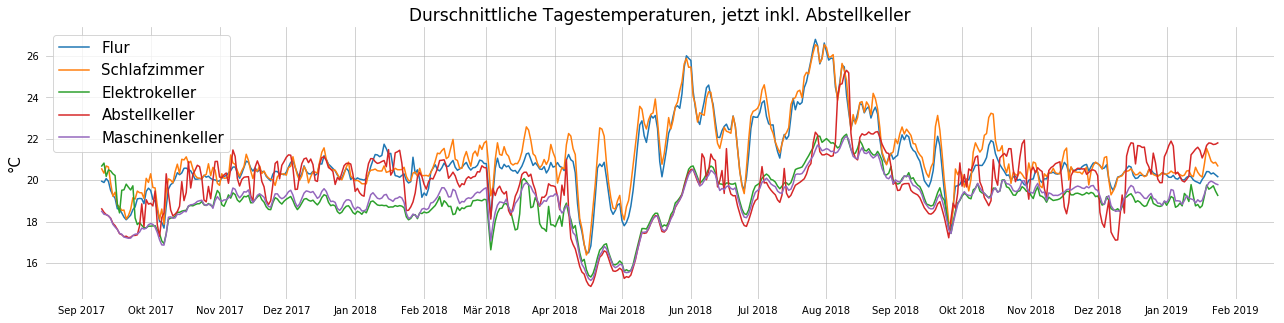

In [55]:
# Wiederholen wir die Temperaturplots wie oben jetzt zusammen mit dem Abstellkeller
datum_df = df.groupby(df.index.date).mean()
datum_df.index = pd.to_datetime(datum_df.index)

# Plotte die durchschnittlichen Tages-Temperaturen und zeige alle Räume im Verhältnis zueinander
plt.figure(figsize=(22,5))

plt.plot(np.arange(len(datum_df)), datum_df.TI) # Tagestemperaturen
plt.plot(np.arange(len(datum_df)), datum_df.T1)
plt.plot(np.arange(len(datum_df)), datum_df.T2)
plt.plot(np.arange(len(datum_df)), datum_df.T3)
plt.plot(np.arange(len(datum_df)), datum_df.T4)
plt.xticks(positionsliste, 
           ['Sep 2017','Okt 2017','Nov 2017','Dez 2017','Jan 2018','Feb 2018','Mär 2018',
           'Apr 2018','Mai 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Okt 2018',
           'Nov 2018','Dez 2018','Jan 2019', 'Feb 2019']) # Monatsticks
plt.ylabel('°C', fontsize=15)

plt.title('Durschnittliche Tagestemperaturen, jetzt inkl. Abstellkeller',
         fontsize= 17)

plt.legend(loc='upper left', fontsize=15, 
           labels=['Flur','Schlafzimmer', 'Elektrokeller','Abstellkeller','Maschinenkeller'])

# Entferne den schwarzen Rahmen und mach die Grafik hübscher
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False, left=False)
plt.grid(alpha = 0.7)

plt.show()

Wir können jetzt zusätzliche Beobachtungen machen:

1. Im Vergleich zu den anderen Zimmern, hatte der **Abstellkeller** eine besonders **volatile Temperatur**.

2. Die Temperatur des Abstellkellers korreliert stark mit den anderen Kellerräumen im Sommer und schwankte stark
in den übrigen Monaten. Auffallend ist hierbei auch die **Maximaltemperatur von ~25°C** Grad Anfang August 2018,
während die anderen Kellerzimmer kühl blieben. Zudem gab es einen durchaus beständig **warmen Abstellkeller 
ab Mitte Dezember 2018**, dort drin war es sogar wohliger als in den Erdgeschosszimmern oberhalb.

3. Ende September 2018 können wir eine interessante **Konvergenz aller 5 Raumtemperaturen bei etwa 17°C** beobachten.
Ist das einem Zufall zu verdanken? Einem Messfehler?

In [56]:
# Sehen wir uns die beschreibenden Statistiken an.
datum_df.describe()
# Die höchste Tagesschnitttemperatur, wie bereits im Diagramm ersichtlich, wurde im Flur gemessen
# und betrug 26.8 °C im späten Juli 2018. Siehe Tabellenzelle (max,TI)

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
count,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00
mean,20.89,58.74,12.44,21.14,63.22,13.79,19.04,66.79,12.70,19.72,61.41,11.94,19.05,68.70,13.13
std,1.66,6.27,1.50,1.66,6.47,1.34,1.19,5.77,1.74,1.62,9.16,1.74,1.17,5.98,1.58
min,16.50,41.43,7.09,16.39,43.08,8.82,15.33,45.45,7.35,14.88,42.01,7.88,15.17,52.09,7.62
25%,20.08,54.81,11.49,20.23,58.76,12.83,18.56,63.92,11.47,18.89,55.08,10.70,18.64,64.58,12.03
50%,20.51,58.30,12.28,20.65,63.32,13.71,19.01,67.14,12.61,19.93,59.43,12.06,19.17,68.75,13.06
75%,21.23,61.67,13.28,21.80,66.89,14.66,19.61,70.99,13.84,20.79,69.50,12.97,19.60,72.96,14.27
max,26.80,77.21,17.09,26.54,79.04,17.99,22.22,80.04,16.99,25.30,83.00,16.47,22.12,82.04,17.05


In [57]:
# Im Bezug auf Beobachtung Nr. 3 --> Zeige den Abschnitt, wo wir die Temperaturkonvergenz vermuten.
datum_df.loc['2018-09-24':'2018-09-27',['TI','T1','T2','T3','T4']]
# Am 25.09.2018 waren die Temperaturen tatsächlich sehr nah beieinander.
# Allerdings sind das die von uns berechneten Tagesdurchschnitte. Wie sieht es mit den originalen Messungen aus?

,TI,T1,T2,T3,T4
2018-09-24,18.52,19.06,18.43,17.71,18.13
2018-09-25,17.62,17.98,17.71,17.22,17.62
2018-09-26,17.65,17.89,17.44,18.13,17.43
2018-09-27,18.82,18.57,18.01,18.89,17.93


### Hier ist die Tagesschnittbetrachtung zu Ende. Übergang zur originalen 15-Minuten-Betrachtung
<br>

In [58]:
# Weiterhin im Bezug auf Beobachtung Nr. 3
# Zeige den Ausschnitt der Tabelle, wo zu einem (oder mehreren) Messzeitpunkt(en), in allen 5 Zimmern
# die gleiche Temperatur gemessen wurde.

df.loc[(df['TI'] == df['T1']) & 
       (df['TI'] == df['T2']) &
       (df['TI'] == df['T3']) &
       (df['TI'] == df['T4']), ['TI','T1','T2','T3','T4']]

# Solche Zeitpunkte gab es nicht

,TI,T1,T2,T3,T4
Timestamp,,,,,


In [59]:
# Alternativ: weiterhin im Bezug auf Beobachtung Nr. 3:
# Zeige den Zeitpunkt aus der Tabelle, an dem der kumulierte Abstand 
# zwischen allen Raumtemperaturen am geringsten war

print('\n')
print(df[['TI','T1','T2','T3','T4']].diff(axis=1).abs().cumsum(axis=1).T4.idxmin())
df.loc[df.index=='2018-10-03 02:15:00',['TI','T1','T2','T3','T4']]

## Hier die "manuelle Berechnung", um das Ergebnis auf Stimmigkeit zu überprüfen:
#kumulative_distanz = []

#for index, row in df.iterrows():
#    print(row.TI, row.T1, row.T2, row.T3, row.T4)
#    kumulative_distanz.append(abs(row.TI - row.T1) + 
#                              abs(row.T1 - row.T2) + 
#                              abs(row.T2 - row.T3) + 
#                              abs(row.T3 - row.T4))

## Speichere alle kumulativen Distanzen 
#temperatur_differenzen = pd.Series(kumulative_distanz, index = df.index)



2018-10-03 02:15:00


,TI,T1,T2,T3,T4
Timestamp,,,,,
2018-10-03 02:15:00,19.6,19.4,19.2,19.3,19.3


<Figure size 432x288 with 0 Axes>

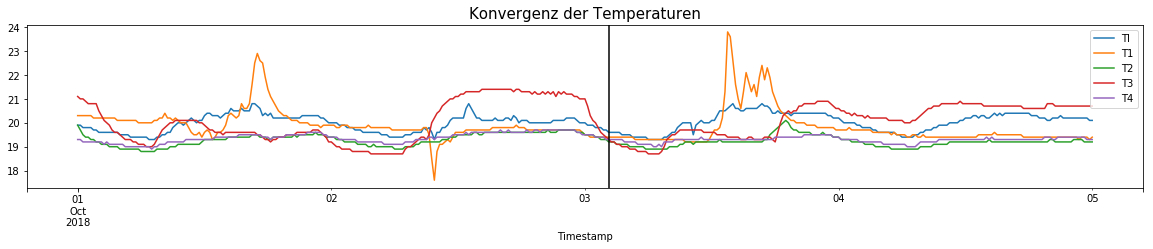

In [60]:
# D.h. die eigentliche Konvergenz fand nicht Ende September 2018 statt, 
# wie die Tagesdurchschnitte suggerieren,
# sondern kurz darauf, Anfang Oktober. Zu keinem anderen Zeitpunkt waren sich
# die Temperaturen über alle Räume hinweg am nächsten.

plt.figure();
df.loc['2018-10-01 00:00:00':'2018-10-05 00:00:00',['TI','T1','T2','T3','T4']].plot(figsize=(20,3));
plt.axvline(x='2018-10-03 02:15:00', c='k');
plt.title('Konvergenz der Temperaturen', fontsize=15);

### Wir lernen daraus: Die Durchschnittsbetrachtung ist nützlich um einen allgemeinen Trend erkennbar zu machen, kann jedoch (wie dieses Beispiel zeigt) auf falsche Fährten führen.

<br>

### In welchem Zimmer gab es die höchste überhaupt gemessene Temperatur?

In [61]:
df.describe().loc['max', ['TI','T1','T2','T3','T4']].sort_values(ascending=False)
# Die höchste Temperatur betrug 30.6 °C und zwar im Schlafzimmer

T1    30.6
TI    28.0
T3    25.4
T2    23.1
T4    22.5
Name: max, dtype: float64

### Welches Zimmer war im Schnitt das wärmste?

In [62]:
df.describe().loc['mean', ['TI','T1','T2','T3','T4']].sort_values(ascending=False)

T1    21.14
TI    20.89
T3    19.72
T4    19.05
T2    19.04
Name: mean, dtype: float64

#### *ø-Temperatur: Schlafzimmer (21.14 °C) > Flur (20.89 °C) > Abstellkeller (19.72 °C) > Maschinenkeller (19.05 °C) > Elektrokeller (19.04 °C)*
<br>

### In welchem Raum war die Temperatur "am stabilsten" über den gesamten Beobachtungszeitraum hinweg?

In [63]:
# Um diese Frage zu beantworten können wir uns einerseits die Standardabweichungen ansehen:
df.describe().loc['std', ['TI','T1','T2','T3','T4']]
# Demnach hatten die Kellerräume T2 und T4, also Elektrokeller und Maschinenkeller die 
# geringsten ø-Abweichungen vom Mittelwert. 

TI    1.72
T1    1.80
T2    1.22
T3    1.68
T4    1.18
Name: std, dtype: float64

#### *Stabilität (1): Maschinenkeller > Elektrokeller > Abstellkeller > Flur  > Schlafzimmer*
<br>



TI    2521.2
T1    3087.7
T2    1332.3
T3    1808.9
T4     909.1
Name: 2019-01-24 19:15:00, dtype: float64


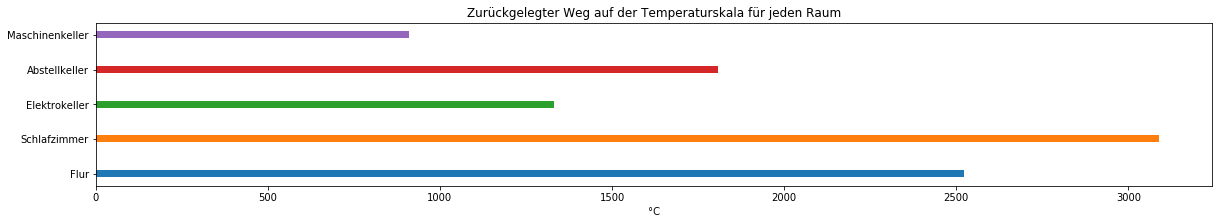

In [64]:
# Wir können die Frage nach der Stabilität aber auch mit dem geringsten zurückgelegten Weg
# auf der Temperatur-Skala beantworten. 

# Man kann sich das so vorstellen:
# Ziehe an jeder "Plotschnur" bis sie alle stramm sind und schaue welche die kürzeste/längste ist.

kum_diff_reihen = df[['TI','T1','T2','T3','T4']].diff().abs().cumsum()
print('\n')
print(kum_diff_reihen.iloc[-1,:])


# Um das Ergebnis auf Stimmigkeit zu überprüfen, können wir das Ganze auch
# wieder "manuell berechnen":
#degrees_distances_travelled = []
#
#for col in ['TI','T1','T2','T3','T4']:
#    counter = 0
#    total_distance = 0
#    for entry in df[str(col)]:
#        if counter != 48192:
#            counter += 1 
#            next_entry = df[str(col)][counter]
#            total_distance += abs(next_entry - entry)
#    
#    degrees_distances_travelled.append(total_distance)
#            
#degrees_distances_travelled


plt.figure();
kum_diff_reihen.iloc[-1,:].plot(kind='barh', figsize=(20,3), width=0.2);
plt.title('Zurückgelegter Weg auf der Temperaturskala für jeden Raum');
plt.yticks(np.arange(5), ['Flur','Schlafzimmer','Elektrokeller','Abstellkeller','Maschinenkeller'], rotation=0);
plt.xlabel('°C');

Wie man sehen kann, hat der Maschinenkeller "die kürzeste Reise" auf der Temperaturskala hinter sich gebracht, nämlich 909 °C. Zur selben Zeit schwankte die Temperatur im Schlafzimmer mehr als 3 mal so stark und brachte eine Gesamtstrecke von 3087 °C hinter sich.

#### *Stabilität (2): Maschinenkeller > Elektrokeller > Abstellkeller > Flur > Schlafzimmer*

Obwohl beide Stabilitätskenngrößen hier die gleiche Reihenfolge aufweisen, haben sie dennoch beide ihre Daseinsberechtigung, da sie unterschiedliche Fragen beantworten: 
    - Stabilität 1: Wie weit und wie häufig war die Temperatur an bestimmten Abschnitten auf der Skala?
    - Stabilität 2: Wie "unruhig" oder "zitterig" war die Temperatur im Verhältnis zur Zeit?
    
*So kann z.B. eine verlassene Hütte in der Wildnis eine Spanne von 60°C erreichen. + 30°C im Sommer und - 30°C im Winter. Jedoch könnte ein sporadisch beheiztes Zimmer in einem Wohnhaus eine größere Strecke hinter sich gebracht haben, obwohl es niemals kälter als 15 °C und niemals wärmer als 25°C war.*

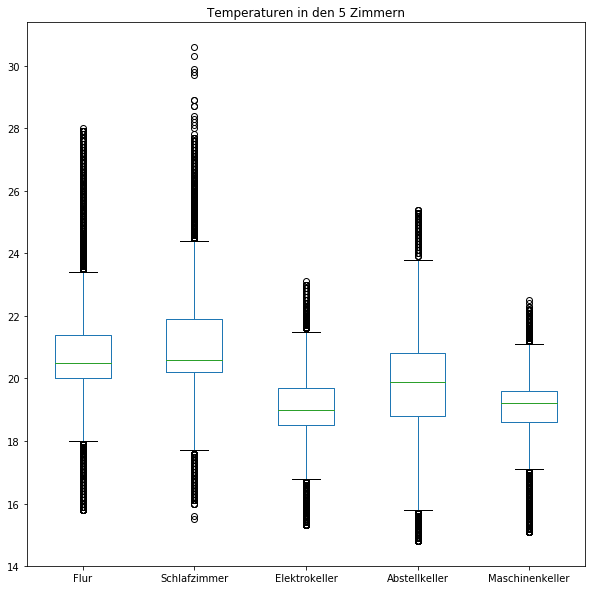

In [65]:
%matplotlib inline

df[['TI','T1','T2','T3','T4']].plot.box(figsize=(10,10), 
                                        title='Temperaturen in den 5 Zimmern');
plt.xticks((1,2,3,4,5),['Flur','Schlafzimmer','Elektrokeller','Abstellkeller','Maschinenkeller'], rotation=0);

Zur Erinnerung: 
Innerhalb der Boxen befinden sich 50% aller Messungen, die grüne Linie ist der jeweilige Median. Die "Whisker" oben und unten decken die 1,5 fache Länge der jeweiligen Box ab. (Als "Boxlänge" ist hier natürlich der Abschnitt auf der y-Achse zu verstehen) Somit kann man alle darüber hinausgehenden Messungen als Ausreißer betrachten. (Die schwarzen Kreise)

So ist daran auch zu sehen, dass die Temperatur im Abstellkeller (T3) weniger Intervall abgedeckt hatte als im Schlafzimmer (T1). **Und dennoch können wir die Temperatur im Abstellkeller als die am wenigsten beständige bezeichnen.**

<br>

### Für die nachfolgenden Einsichten eignet sich die Tabelle mit den Tagesdurchschnitten wieder besser. (jede Zeile ist ein Kalendartag)

In [66]:
datum_df.head()

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4
2017-09-09,19.95,69.73,14.26,20.55,58.91,12.14,20.69,66.95,14.31,18.62,74.86,14.09,18.50,74.64,13.93
2017-09-10,19.89,71.34,14.57,20.34,72.26,15.20,20.83,58.51,12.32,18.45,76.89,14.33,18.36,76.57,14.17
2017-09-11,20.08,70.81,14.63,20.69,72.16,15.50,20.19,56.26,11.20,18.34,78.90,14.62,18.34,77.53,14.35
2017-09-12,19.95,68.96,14.08,20.64,69.11,14.77,20.50,54.02,10.87,18.28,78.73,14.52,18.29,77.84,14.36
2017-09-13,19.51,71.12,14.14,19.86,71.97,14.66,20.45,52.34,10.36,18.17,79.38,14.54,18.15,78.23,14.29


In [67]:
# Erstelle 5 separate DataFrames (Tabellen), jeweils eine für jeden Sensor/Raum
flur = datum_df[['TI','RHI','DEWI']].copy()
schlafzimmer = datum_df[['T1','RH1','DEW1']].copy()
elektrokeller = datum_df[['T2','RH2','DEW2']].copy()
abstellkeller = datum_df[['T3','RH3','DEW3']].copy()
maschinenkeller = datum_df[['T4','RH4','DEW4']].copy()

# Füge jeder DataFrame eine neue Spalte mit der Zimmerbezeichnung hinzu
flur['Ort'] = 'Flur'
schlafzimmer['Ort'] = 'Schlafzimmer'
elektrokeller['Ort'] = 'Elektrokeller'
abstellkeller['Ort'] = 'Abstellkeller'
maschinenkeller['Ort'] = 'Maschinenkeller'

# Sorge dafür, dass alle Spalten in den Tabellen "Temp", "Feuchtigkeit", "Taupunkt" und "Ort" lauten
for matrix in [flur,schlafzimmer,elektrokeller,abstellkeller,maschinenkeller]:
    matrix.columns = ['Temperatur','Feuchtigkeit','Taupunkt','Ort']

# Stapele alle 5 DataFrames untereinander in eine einzige große Tabelle, statt nebeneinander
langes_df = pd.concat([flur, schlafzimmer, elektrokeller, abstellkeller, maschinenkeller], axis=0)

In [68]:
langes_df.head(3)

,Temperatur,Feuchtigkeit,Taupunkt,Ort
2017-09-09,19.95,69.73,14.26,Flur
2017-09-10,19.89,71.34,14.57,Flur
2017-09-11,20.08,70.81,14.63,Flur


In [69]:
langes_df.shape

(2515, 4)

In [70]:
# Jetzt Anzahl Reihen pro Zimmer
langes_df.Ort.value_counts()

Flur               503
Abstellkeller      503
Elektrokeller      503
Schlafzimmer       503
Maschinenkeller    503
Name: Ort, dtype: int64

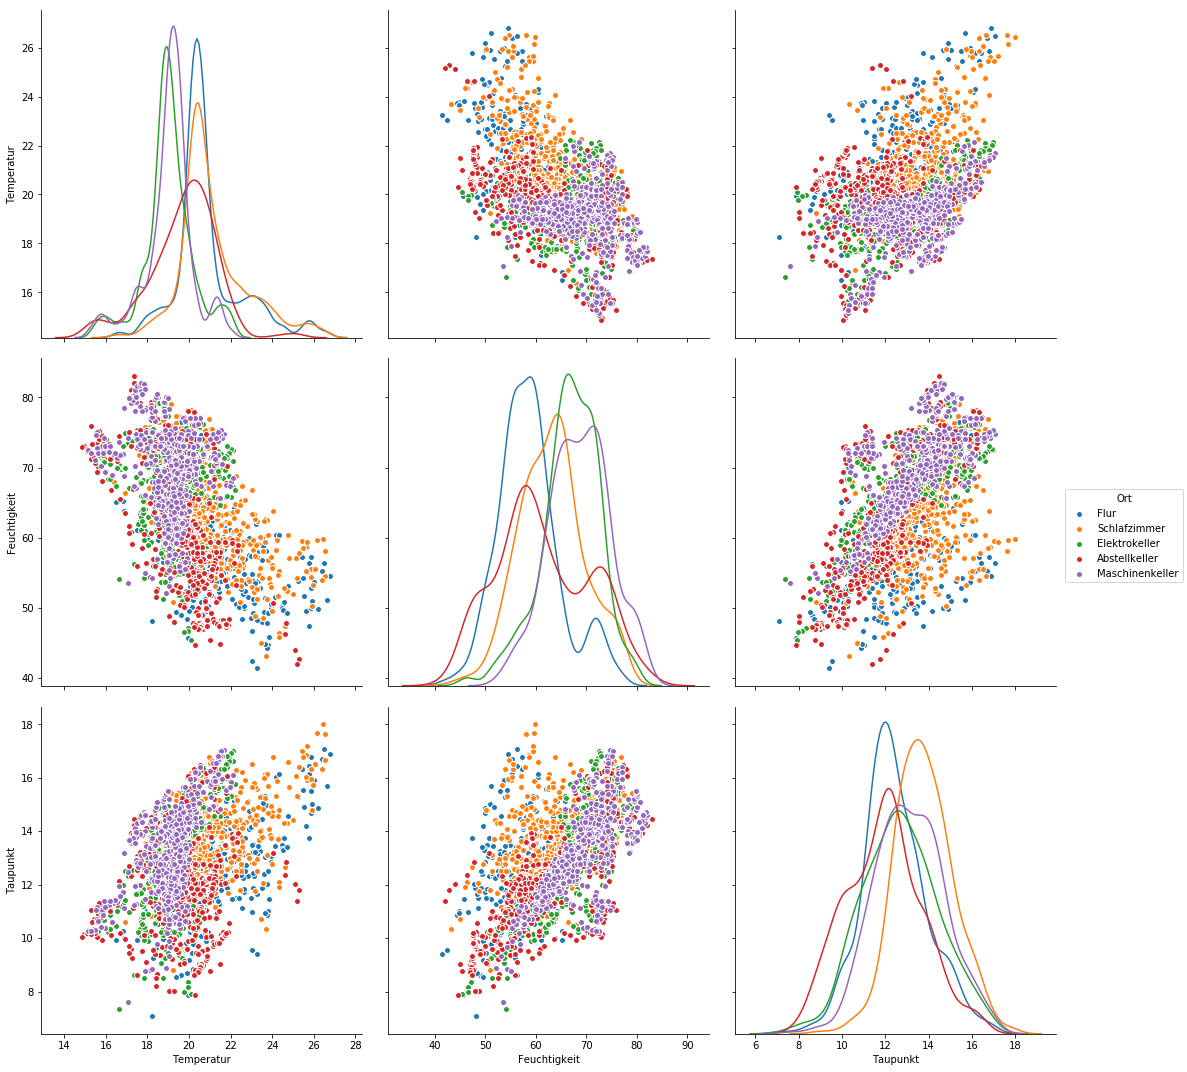

In [71]:
sns.pairplot(langes_df, hue='Ort', diag_kind='kde', size=5);


**Beobachtung 1**: Quadrant (Temperatur, Temperatur) zeigt die Kerndichteschätzer 
(aka Histogramme mit stetiger Darstellung)
für die Temperaturen in den 5 Räumen. Wie nicht anders erwartet sehen wir mit Abstand die höchste Varianz
beim Abstellkeller, der zwischen "kalt" und "warm" öfter schwankte als alle anderen Zimmer.

**Beobachtung 2**: Um Bezug auf die Kerndichten von Temperatur und Feuchtigkeit können wir feststellen, 
dass augenscheinlich der Flur(blau) und der Elektrokeller(grün) die am weitesten voneinander entfernten 
Verteilungs-Cluster bilden (wobei "weit" nicht im absoluten Sinne zu verstehen ist)

**Beobachtung 3**: Der Taupunkt korreliert positiv mit der Feuchtigkeit und der Temperatur für alle Räume.
Hingegen scheinen Feuchtigkeit und Temperatur negativ miteinander korreliert zu sein.

*Notiz: die Diagonale der Streumatrix wird durch die 3 Kerndichteschätzungen markiert und trennt das Schaubild 
in die untere linke und obere rechte Hälfte.
Wie immer ist dabei nur eine der beiden Seiten relevant für unsere Analyse, 
da die andere nichts weiter ist als ein Spiegelbild.*

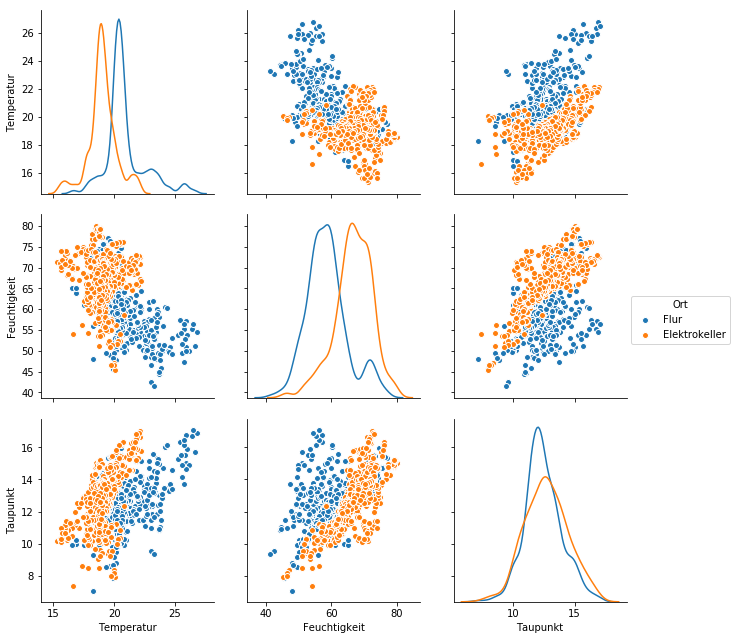

In [72]:
# Isolieren wir die Verteilungen von Feuchtigkeit und Temperatur für den Flur und den Elektrokeller:
fl_el_df = langes_df[langes_df.Ort.isin(['Flur','Elektrokeller'])].copy()
sns.pairplot(fl_el_df, hue='Ort', diag_kind='kde', size=3);

# Wie vermutet, können wir die Cluster jetzt deutlicher als im vorherigen Diagramm wahrnehmen.

<IPython.core.display.Javascript object>


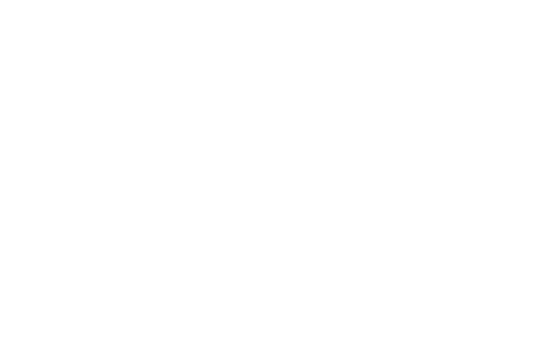

<IPython.core.display.Javascript object>


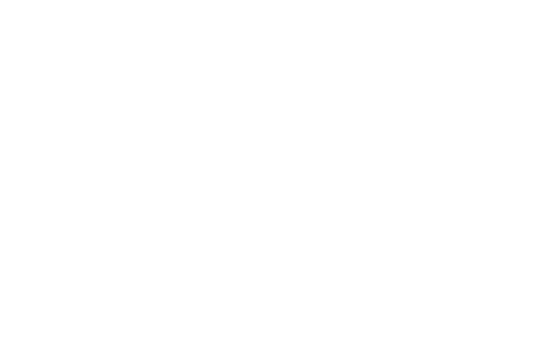

In [73]:
# Durch den glücklichen Umstand genau 3 Variablen in unserem Datensatz zu haben,
# können wir es uns nicht nehmen eine 3-dimensionale Darstellung zu generieren.

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(fl_el_df['Temperatur'], fl_el_df['Feuchtigkeit'], fl_el_df['Taupunkt'],
           marker='o', s=10)
ax.set_xlabel('Temperatur °C')
ax.set_zlabel('Taupunkt °C')
ax.set_ylabel('rel. Luftfeuchtigkeit in %')

plt.show()

# Diese Zelle muss ggf. mehrmals hintereinander ausgeführt werden,
# damit der 3D-Plot auftaucht.

##### Wenn wir die 3D-Punktewolke in die richtige Position bringen, können wir einen starken linearen Zusammenhang erkennen. Also eignen sich diese Daten bestens für eine lineare Regression. Dazu später im Notebook.


### <br>


# Frage Nr. 2: Bestand Schimmelgefahr?

In [74]:
# Für die Taubildung und die damit einhergehende Schimmelgefahr muss 
# (neben anderen Faktoren) die Temperatur den Taupunkt unterschritten haben.

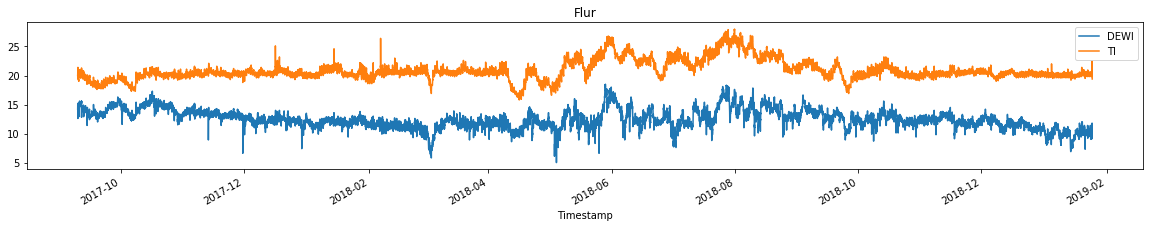

In [75]:
%matplotlib inline
df[['DEWI','TI']].plot(figsize=(20,3), title='Flur');

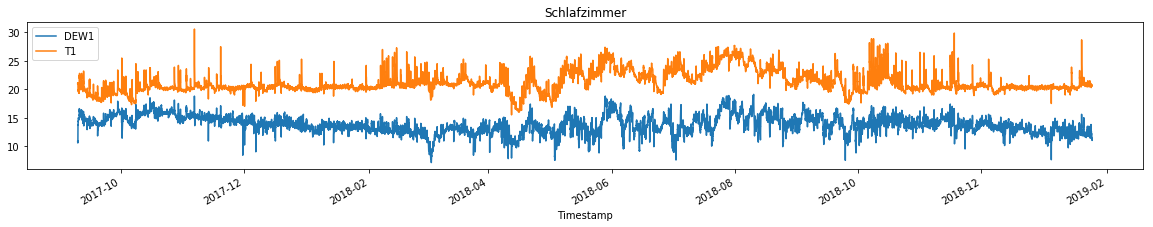

In [76]:
df[['DEW1','T1']].plot(figsize=(20,3), title='Schlafzimmer');

In [77]:
# Im Oktober 2017 scheint es im Schlafzimmer eine kurzfristige Überschneidung gegeben zu haben. 
# Wenn dem so war, zeige diese Aussschnitt in der Tabelle
df.loc[df.DEW1 >= df.T1,['DEW1','T1']]
# Kein solcher Zeitpunkt vorhanden ---> Entwarnung

,DEW1,T1
Timestamp,,


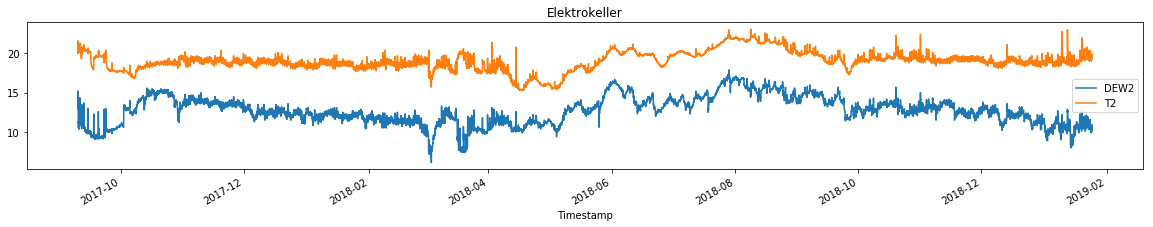

In [78]:
df[['DEW2','T2']].plot(figsize=(20,3), title='Elektrokeller');

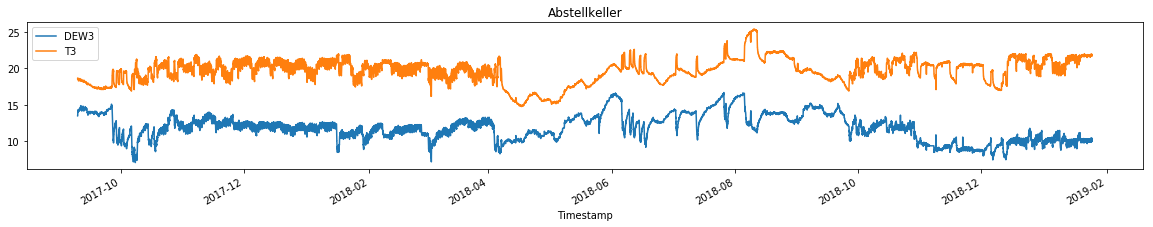

In [79]:
df[['DEW3','T3']].plot(figsize=(20,3), title='Abstellkeller');

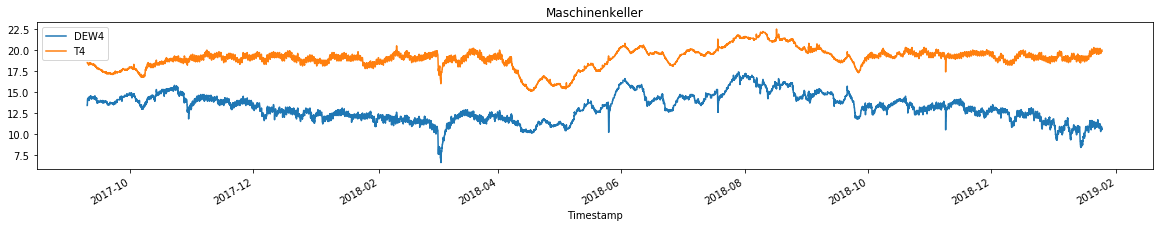

In [80]:
df[['DEW4','T4']].plot(figsize=(20,3), title='Maschinenkeller');

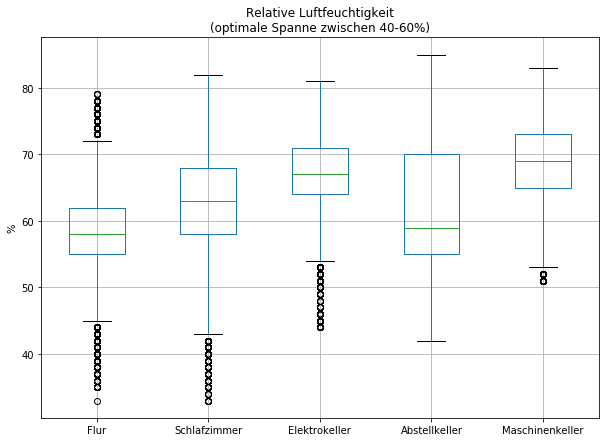

In [81]:
%matplotlib inline
df[['RHI','RH1','RH2','RH3','RH4']].boxplot(figsize=(10,7));
plt.ylabel('%')
plt.title('Relative Luftfeuchtigkeit\n(optimale Spanne zwischen 40-60%)');
plt.xticks((1,2,3,4,5),['Flur','Schlafzimmer','Elektrokeller','Abstellkeller','Maschinenkeller'], rotation=0);

Da die rel. Luftfeuchtigkeit im Hamburger Raum stets zwischen 80 und 90% liegt, kann man sagen, dass die Verhältnisse im Haus sehr gute Werte aufweisen. Zudem ist es normal, dass die Luft im Keller stets etwas feuchter ist als im Erdgeschoss. Alles im grünen Bereich.

### Entwarnung: Für den im Datensatz aufgezeichneten Zeitraum bestand in keinem der Zimmer die Gefahr einer Taubildung mit möglicher einhergehender Schimmelbildung.

### <br>

# Frage Nr. 3: Um welche Tageszeit waren die Werte für gewöhnlich am stabilsten?


In [82]:
df.duplicated(subset=None, keep=False).sum()
# Zur Erinnerung: es gab insgesamt 11962 Zeilen, die keine Unikate waren, 
# das sind ~24% aller Zeilen

11962

In [83]:
duplikate = df.loc[df.duplicated(subset=None, keep=False), :]

# Dazu summieren wir jedes Vorkommnis eines Duplikats für jeden der 96 Messzeitpunkte am Tag,
# um herauszufinden wie und ob sich eine besonders stabile Tageszeit herauskristalisiert.
uhr = duplikate.reset_index().Timestamp.dt.time.value_counts().sort_index()
# Mit parameter keep=False sorgen wir dafür, dass alle Duplikate herangezogen werden und nicht nur
# das erste (oder letzte) Vorkommnis eines Duplikats.
uhr.head(15)

00:00:00    108
00:15:00    121
00:30:00    128
00:45:00    143
01:00:00    165
01:15:00    167
01:30:00    174
01:45:00    179
02:00:00    185
02:15:00    193
02:30:00    204
02:45:00    201
03:00:00    224
03:15:00    222
03:30:00    208
Name: Timestamp, dtype: int64

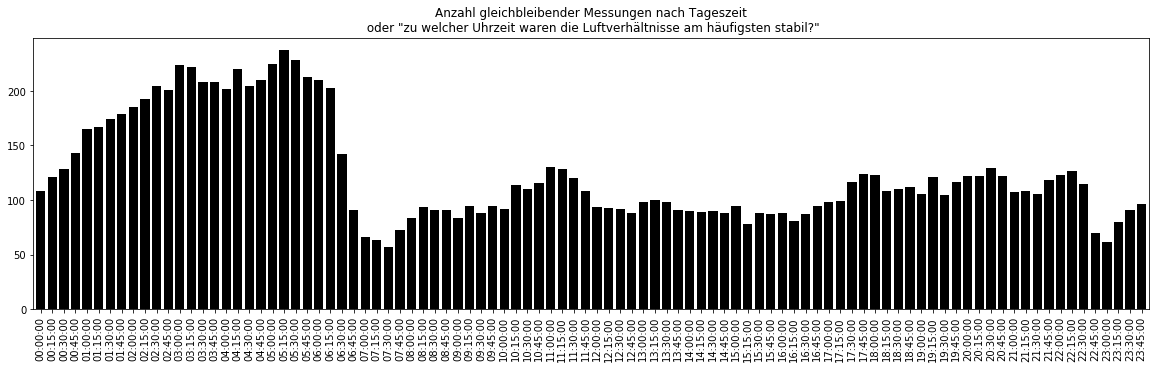

In [84]:
%matplotlib inline
uhr.plot(kind='bar', figsize=(20,5), color='k', width=0.8,
         title='Anzahl gleichbleibender Messungen nach Tageszeit'
         '\n oder "zu welcher Uhrzeit waren die Luftverhältnisse am häufigsten stabil?"');


Diese Verteilung stabiler Messungen nach Tageszeit legt nahe, dass der menschliche Faktor eine Rolle gespielt haben könnte. Wenn der Mensch schläft, nimmt er keinen Einfluss auf die Luftverhältnisse
(außer seiner körperlichen Präsenz). Elektronische Geräte sind abgeschaltet oder auf standby. Wärme und Feuchtigkeit 
erzeugende Räume wie die Küche oder das Bad (in unmittelbarer Flurnähe) werden in der Nacht nicht benutzt. 
Damit wäre auch zu erklären, weshalb zwischen 6:40 und 7:30 die Luftstabilität ihren Tiefpunkt erreicht, so wie
um etwa 23:00 Uhr herum. Morgens machen sich die Bewohner fertig für den Tag, benutzen die Toilette, Küche, etc.
Abends machen Sie sich fertig für die Nacht.

Tagsüber, zwischen 8 und 19 Uhr Uhr scheint sich dementsprechend die Stabilität wieder etwas zu berappeln, wenn die
Bewohner außer Haus sind, jedoch werden die Verhältnisse nicht im Ansatz wieder so stabil wie in den Nachstunden 
und es erklärt auch nicht weshalb die Stabilität in den Nachmittag/Abendstunden zwischen 17:30 ud 22:30 wieder
hinzugewinnt, zu einer Zeit, in der die Bewohner für gewöhnlich ihren Feierabend zu Hause verbringen.

Natürlich gibt es jede Menge unbekannte Faktoren neben dem menschlichen: Luftverhältnisse außerhalb des Hauses, 
möglicherweise automatisierte Klimaanlage oder Ähnliches. Andere Vorrichtungen wie Bodenheizung, die auf die
Luftverhältnisse wirken lange nachdem die Bewohner aus dem Haus sind. Eingeschaltete Maschinen im Maschinen- und Elektrokeller. Haustiere etc. Ggf. treffen die Gewohnheiten der Bewohner dieses Hauses nicht auf die gewöhnlichen Muster zu.

**Letztlich schließt diese Darstellung auch alle Samstage und Sonntage ein, wo die Besitzer tendenziell eine höhere Wahrscheinlichkeit haben tagsüber zu Hause zu sein. Würde sich dieser Trend noch verdeutlichen, wenn wir Arbeitstage 
und Wochenendtage voneinander gesondert betrachten?**

<br>

## Frage Nr. 4: Können wir für besonders instabile Zeitabschnitte die menschliche Präsenz verantwortlich machen?

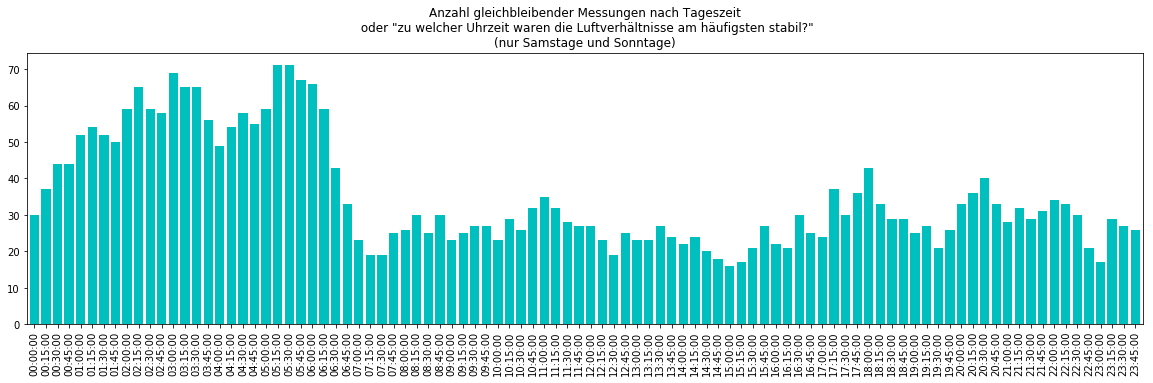

In [85]:
# Filtere alle Samstage und Sonntage raus
# Montag ist dayofweek 0, Samstag ist dayofweek 5 und Sonntag ist dayofweek 6
uhr_samsonn = duplikate[duplikate.index.dayofweek >= 5]
uhr_samsonn = uhr_samsonn.reset_index().Timestamp.dt.time.value_counts().sort_index()
uhr_samsonn.plot(kind='bar', figsize=(20,5), color='c', width=0.8, 
                 title='Anzahl gleichbleibender Messungen nach Tageszeit'
                 '\n oder "zu welcher Uhrzeit waren die Luftverhältnisse am häufigsten stabil?"\n'
                 '(nur Samstage und Sonntage)');

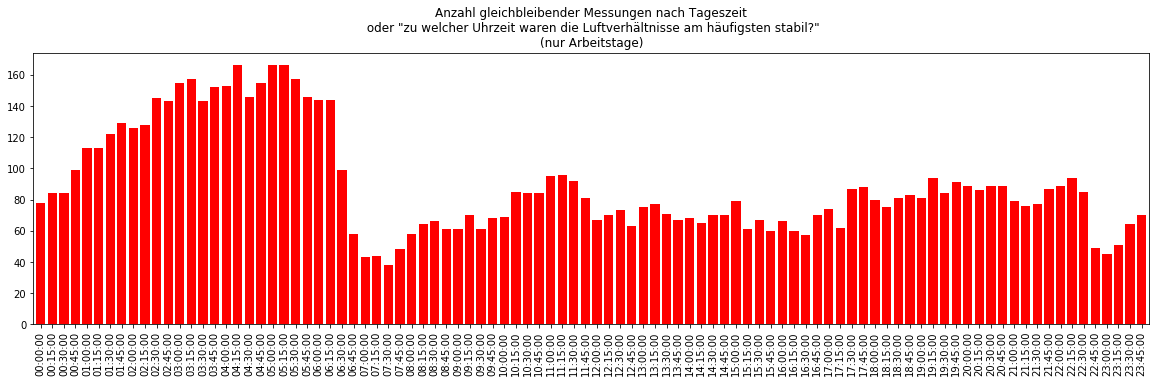

In [86]:
uhr_arbeitswoche = duplikate[duplikate.index.dayofweek <= 4]
uhr_arbeitswoche = uhr_arbeitswoche.reset_index().Timestamp.dt.time.value_counts().sort_index()
uhr_arbeitswoche.plot(kind='bar', figsize=(20,5), color='r', width=0.8,
                     title='Anzahl gleichbleibender Messungen nach Tageszeit'
                     '\n oder "zu welcher Uhrzeit waren die Luftverhältnisse am häufigsten stabil?"\n'
                     '(nur Arbeitstage)');

# Die Unterscheidung zwischen Wochenendtagen und Arbeitstagen scheint keinen deutlichen Einfluss 
# auf die Luftverhältnisse zu haben, wenn auch das Verhältnis von stabilen Abschnitten am Nachmittag
# in der Arbeitswoche etwas höher zu sein scheint, als an Wochenenden. Schauen wir es uns genauer an.

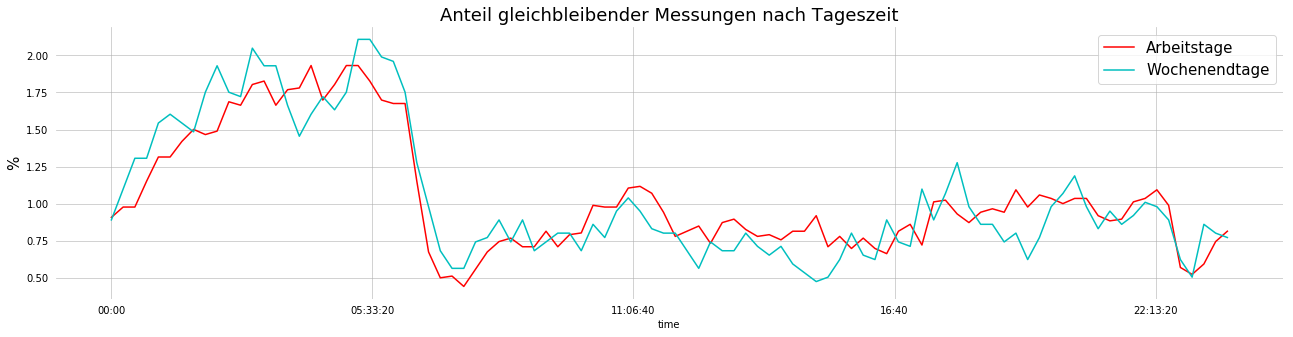

In [87]:
# Konvertiere die absoluten Summen in Anteile (%-Angaben), 
# schließlich gab es viel mehr Arbeitstage als Wochenendtage.
# Damit können wir anteilige Vergleiche ziehen.

%matplotlib inline

uhr_arbeitswoche = duplikate[duplikate.index.dayofweek <= 4]
uhr_arbeitswoche = uhr_arbeitswoche.reset_index().Timestamp.dt.time.value_counts(normalize=True).sort_index()*100
uhr_samsonn = duplikate[duplikate.index.dayofweek >= 5]
uhr_samsonn = uhr_samsonn.reset_index().Timestamp.dt.time.value_counts(normalize=True).sort_index()*100

plt.figure(figsize=(22,5))
plt.plot(uhr_arbeitswoche, '-r', uhr_samsonn, '-c');
plt.ylabel('%', fontsize=15)

plt.title('Anteil gleichbleibender Messungen nach Tageszeit',
         fontsize= 18)

plt.legend(loc='upper right', fontsize=15, 
           labels=['Arbeitstage','Wochenendtage'])

# Entferne den schwarzen Rahmen und mach die Grafik hübscher
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False, left=False)
plt.grid(alpha = 0.7)



### Wie bereits vermutet scheinen die Luftverhältnisse im Haus an Arbeitstagen (MO-FR) Nachmittags etwas stabiler zu sein, als an Wochenendtagen. Und in der Nacht ist dieses Verhältnis umgekehrt. Jedoch ist diese Neigung schwach ausgeprägt, sodass man keine allgemeingültige Aussage darüber treffen kann.

<br>

# Frage Nr. 5: Welchen Einfluss hatten die Luftverhältnisse außerhalb des Hauses auf die Messungen im Haus? 

Quelle für die Wetterdaten von der Wetterstation Hamburg-Fuhlsbüttel:
- https://dbup2date.uni-bayreuth.de/wetterdaten.html
### Die Entfernung zwischen dem Haus und der nächstgelegenen Wetterstation betrug 15,51 km Luftlinie.
<br>

#### Variablen die uns interessieren in gelb.

![](Wettermessung.png)

In [88]:
# Lies obigen Datensatz ein
station_mess = pd.read_csv('wetterdaten_Wettermessung.csv', sep=';', index_col='Stations_ID')

# Filtere Tabelle nach Stations_ID: 1975. Diese entspricht der Wetterstation Hamburg-Fuhlsbüttel
station_df = station_mess[station_mess.index == 1975]
station_df.head()

,Datum,Qualitaet,Min_5cm,Min_2m,Mittel_2m,Max_2m,Relative_Feuchte,Mittel_Windstaerke,Max_Windgeschwindigkeit,Sonnenscheindauer,Mittel_Bedeckungsgrad,Niederschlagshoehe,Mittel_Luftdruck,Unnamed: 14
Stations_ID,,,,,,,,,,,,,,
1975,2017-09-16,3.0,"4,5","7,2","10,7",14,"89,83","3,2","8,7",0,"5,8","0,1","1008,39",NaN
1975,2017-09-17,3.0,"6,4","8,6","11,2","16,8","89,17","1,7","6,7","1,333","6,3","2,1","1011,44",NaN
1975,2017-09-18,3.0,"6,7","8,3","11,9","16,8","84,88","1,7","9,1","8,033","5,7","1,1","1012,1",NaN
1975,2017-09-19,3.0,"7,8","8,6","12,2","16,8","85,88","2,2","11,7","6,05",7,"5,9","1014,13",NaN
1975,2017-09-20,3.0,"8,4","10,7","12,5","15,4","87,46","3,4","8,7","0,083","6,9",0,"1016,2",NaN


In [89]:
# Wie sieht es mit der Qualität der Messungen aus?
# Laut Datensatzbeschreibung nimmt die Qualität Stufen 
# von 0 bis 3 an. Wobei (0) schlecht, (3) gut
station_df.Qualitaet.value_counts()
# Es gibt nur 30 "schwache" Messungen, 
# keine einzige "schlechte" (0)
# und sonst nur "gute" (3).

# Es ist gut, dass es so wenige sind, weil es nicht weiter dokumentiert ist, 
# was den Unterschied zwischen den Qualitätsstufen eigentlich ausmacht.

3.0    520
1.0     30
Name: Qualitaet, dtype: int64

In [90]:
# Setze Spalte "Datum" als neuen Index
station_df.set_index('Datum', inplace=True)

# wandle den Index ins datetime format um 
station_df.index = pd.to_datetime(station_df.index)

# Behalte nur interessante Spalten bei: Mittel_2m und Relative_Feuchte
station_df = station_df[['Mittel_2m','Relative_Feuchte']]

# Wandle deutsche Dezimalstellentrennung in angelsächsische um.
station_df['Mittel_2m'] = station_df['Mittel_2m'].str.replace(',','.')
station_df['Relative_Feuchte'] = station_df['Relative_Feuchte'].str.replace(',','.')

# Mache aus String-Einträgen Floats
station_df = station_df.astype('float64');

In [91]:
station_df.head(3)

,Mittel_2m,Relative_Feuchte
Datum,,
2017-09-16,10.7,89.83
2017-09-17,11.2,89.17
2017-09-18,11.9,84.88


In [92]:
# Sind die Einträge jetzt alle numerisch?
station_df.info()
# Ja

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2017-09-16 to 2019-03-19
Data columns (total 2 columns):
Mittel_2m           550 non-null float64
Relative_Feuchte    548 non-null float64
dtypes: float64(2)
memory usage: 12.9 KB


In [93]:
# Gibt's fehlende Messungen?
station_df.isna().sum()
# Ja, zwei

Mittel_2m           0
Relative_Feuchte    2
dtype: int64

In [94]:
# Wo sind sie?
station_df.loc['2018-06-03':'2018-06-08', :]
# Das ist bedauerlich, da die Relative Luftfeuchtigkeit an diesen 
# 2 Tagen starken Schwankungen unterlegen war. Behalten wir die Lücken erstmal bei.

,Mittel_2m,Relative_Feuchte
Datum,,
2018-06-03,18.3,84.17
2018-06-04,16.2,86.04
2018-06-05,18.0,NaN
2018-06-06,20.0,NaN
2018-06-07,21.2,42.71
2018-06-08,22.7,53.50


In [95]:
# Gibt es falsche Einträge (unnatürliche Ausreißer), die als solche nicht erkannt werden, 
# weil sie richtig formatiert sind?
station_df.describe().loc[('min','max'),:]
# Nein, alle Werte scheinen innerhalb ihrer logischen Intervalle zu liegen.

,Mittel_2m,Relative_Feuchte
min,-10.1,37.67
max,27.1,99.71


In [96]:
# Gibt's Duplikate?
print('\n')
print('Duplikate inklusive Index' + ': ' + str(station_df.reset_index().duplicated(subset=None).sum()))
print('Duplikate ohne Index' + ': ' + str(station_df.duplicated(subset=None).sum()))



Duplikate inklusive Index: 0
Duplikate ohne Index: 0


In [97]:
# Wie stehts um die Kontinuität?
# Vergleiche das Zeitdelta zwischen der letzten Messung und der ersten 
# Messung mit der Tabellenlänge:

# Lagen dazwischen genauso viele Tage wie die Tabelle an Reihen hat? (-1)
print(station_df.index[-1] - station_df.index[0])
station_df.shape[0] - 1
# Alles ok!

549 days 00:00:00


549

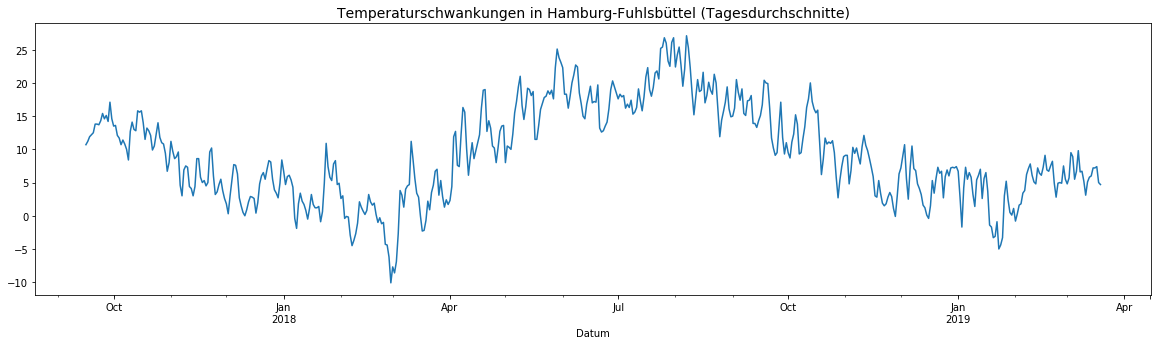

In [98]:
# Temperaturschwankungen in Hamburg-Fuhlsbüttel (Tagesdurchschnitte)
station_df.Mittel_2m.plot(figsize=(20,5));
plt.title('Temperaturschwankungen in Hamburg-Fuhlsbüttel (Tagesdurchschnitte)', fontsize=14);

In [99]:
# Erstelle eine Gesamttabelle, die die Haus- und Wetterstationsmessungen vereint.
# Behalte nur Kalendartage bei, die in beiden Tabellen vorkommen. (inner join)
haus_und_wetterstation_df = pd.merge(datum_df, station_df, how='inner', left_index=True, right_index=True)
haus_und_wetterstation_df.head()

,TI,RHI,DEWI,T1,RH1,DEW1,T2,RH2,DEW2,T3,RH3,DEW3,T4,RH4,DEW4,Mittel_2m,Relative_Feuchte
2017-09-16,18.63,70.84,13.26,18.81,73.22,13.95,18.86,54.79,9.60,17.63,79.15,13.96,17.63,78.78,13.88,10.7,89.83
2017-09-17,18.61,72.75,13.65,18.71,74.69,14.13,18.42,56.56,9.64,17.42,79.86,13.89,17.44,79.30,13.80,11.2,89.17
2017-09-18,18.42,72.50,13.42,18.54,76.44,14.33,19.52,51.78,9.35,17.37,80.85,14.04,17.40,79.99,13.89,11.9,84.88
2017-09-19,18.22,71.08,12.91,18.56,73.07,13.62,19.54,52.34,9.52,17.28,80.08,13.79,17.26,79.67,13.69,12.2,85.88
2017-09-20,18.09,72.62,13.12,18.13,75.83,13.80,19.81,51.51,9.55,17.30,79.80,13.76,17.23,79.14,13.56,12.5,87.46


In [100]:
haus_und_wetterstation_df.shape

(496, 17)

In [101]:
# Durch den inner join verlieren wir insgesamt 61 Tage, 
# aber nur die ersten 7 Tage von den Hausmessungen, was gut ist,
# da wir uns vor allem für den Frühling und den Sommer 2018 interessieren 
(datum_df.shape[0]-haus_und_wetterstation_df.shape[0]) + (station_df.shape[0]-haus_und_wetterstation_df.shape[0])

61

In [102]:
# Ist die neue Tabelle kontinuierlich in ihrem Zeitverlauf?
print(haus_und_wetterstation_df.index[-1] - haus_und_wetterstation_df.index[0])
haus_und_wetterstation_df.shape[0] - 1
# Ja!

# Außerdem wird beim inner join die Reihenfolge der linken Tabelle beibehalten,
# und deren Kontinuität hatten wird schon (implizit) sichergestellt.

495 days 00:00:00


495

In [103]:
# Finde die Positionen in der Tabelle bei denen der Monat wechselt,
# Oder anders gefragt: Wieviele Tage haben die einzelnen Monate gehabt?
# Damit können wir für das kommende Diagramm die Position der Monatsabschnitte auf der x-Achse festlegen.

summe = 0
positionsliste2 = [-16] # Position für den unvollständigen ersten Monat (uns fehlen die ersten 9 Tage)
m = 9

for month in haus_und_wetterstation_df.index.month:
    if m == month:
        summe += 1
    else:
        positionsliste2.append(summe)
        summe += 1
        m = month
        
positionsliste2.append(len(haus_und_wetterstation_df) + 7) # Position für den unvollständigen letzten Monat
print(positionsliste2)

[-16, 15, 46, 76, 107, 138, 166, 197, 227, 258, 288, 319, 350, 380, 411, 441, 472, 503]


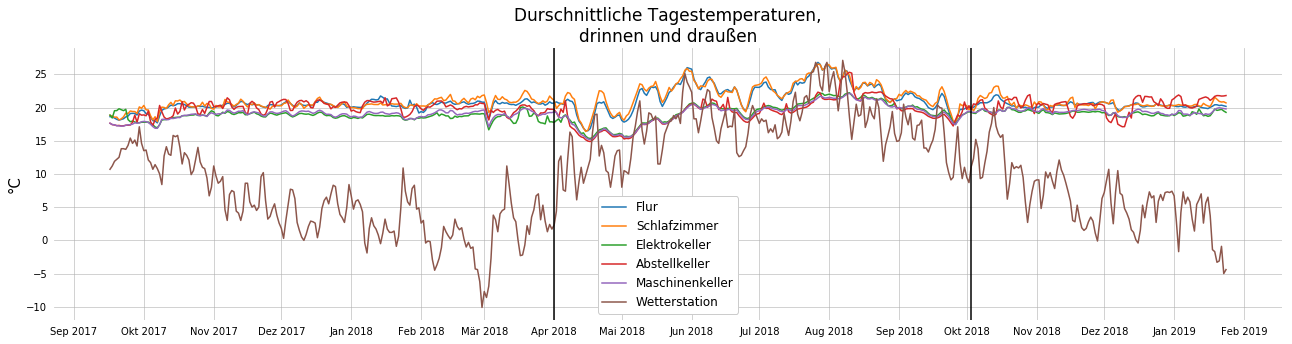

In [104]:
# Plotte!

# Plotte die durchschnittlichen Tages-Temperaturen und zeige alle Räume im Verhältnis zueinander
# UND die Außentemperatur
plt.figure(figsize=(22,5))

plt.plot(np.arange(len(haus_und_wetterstation_df)), haus_und_wetterstation_df.TI)
plt.plot(np.arange(len(haus_und_wetterstation_df)), haus_und_wetterstation_df.T1)
plt.plot(np.arange(len(haus_und_wetterstation_df)), haus_und_wetterstation_df.T2)
plt.plot(np.arange(len(haus_und_wetterstation_df)), haus_und_wetterstation_df.T3)
plt.plot(np.arange(len(haus_und_wetterstation_df)), haus_und_wetterstation_df.T4)
plt.plot(np.arange(len(haus_und_wetterstation_df)), haus_und_wetterstation_df.Mittel_2m)


plt.xticks(positionsliste2, 
           ['Sep 2017','Okt 2017','Nov 2017','Dez 2017','Jan 2018','Feb 2018','Mär 2018',
           'Apr 2018','Mai 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Okt 2018',
           'Nov 2018','Dez 2018','Jan 2019', 'Feb 2019']) # Monatsticks
plt.ylabel('°C', fontsize=15)

plt.title('Durschnittliche Tagestemperaturen,\ndrinnen und draußen',
         fontsize= 17)

plt.legend(loc='lower center', fontsize=12, 
           labels=['Flur','Schlafzimmer', 'Elektrokeller',
                   'Abstellkeller','Maschinenkeller','Wetterstation'],
           framealpha=1)

# Entferne den schwarzen Rahmen und mach die Grafik hübscher
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False, left=False)
plt.grid(alpha = 0.7)

# Füge zwei Balken hinzu, für den Abschnitt in den wir gleich "reinzoomen" werden
plt.axvline(x=197, c='k');
plt.axvline(x=382, c='k');

plt.show()

<Figure size 432x288 with 0 Axes>

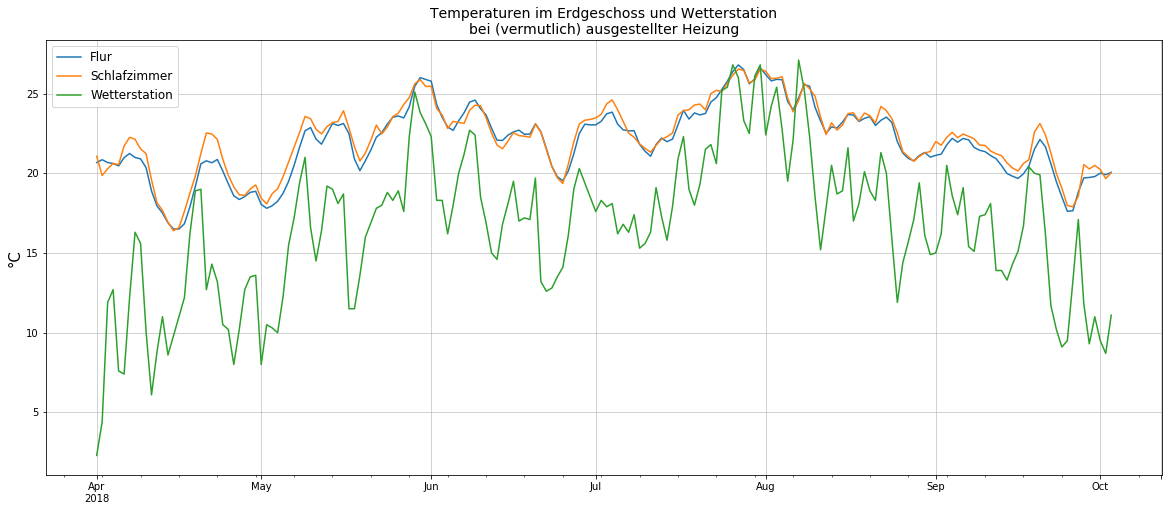

In [105]:
# Plotte den eingegrenzten Ausschnitt April - Oktober 2018
plt.figure()
haus_und_wetterstation_df.loc['2018-04-01':'2018-10-03',
                              ['TI','T1','Mittel_2m']].plot(figsize=(20,8));

plt.grid(alpha = 0.7)
plt.title('Temperaturen im Erdgeschoss und Wetterstation\nbei (vermutlich) ausgestellter Heizung',
         fontsize=14)
plt.legend(loc='upper left', fontsize=12, 
           labels=['Flur','Schlafzimmer','Wetterstation']);
plt.ylabel('°C', fontsize=15);

- Ein gewisser Zusammenhang zwischen der Außentemperatur und den beiden Erdgeschossräumen ist nicht zu bestreiten. 
- Es blieb im Haus stets wärmer als außerhalb.
- Erst ab einer Temperatur von 25°C hatte die Haustemperatur eine abkühlende Wirkung

<br>
<br>

### Lineare Regression
Extrahieren wir aus den Daten eine Formel, mit der wir anhand zweier Angaben (Feuchtigkeit und Taupunkt) die Temperatur abschätzen können

In [106]:
from sklearn.linear_model import LinearRegression

# Dabei benutzen wir die Daten aus einem Zimmer um ein Vorhersagemodell zu entwickeln,
# welches wir anschließend benutzen um die Temperaturen in einem anderen Zimmer zu berechnen.

# Die zwei unterschiedlichsten Zimmer im Bezug auf ihre Statistiken sind der Maschinenkeller T4
# und das Schlafzimmer T1.

# Daten aus denen wir die Formel extrahieren:
X_train = df[['RH4','DEW4']] # Taupunkt und Relative Feuchtigkeit sind die unabhängigen Variablen
y_train = df.T4 # Temperatur ist die abhängige Variable

# Daten mit denen wir die Güte der Prognose testen. (Schlafzimmer)
X_test = df[['RH1','DEW1']]
y_test = df.T1

linreg = LinearRegression().fit(X_train, y_train)

print('\n\n')
print('Koeffizienten des linearen Modells (Gewichte): {}'.format(linreg.coef_))
print('Achsenabschnitt oder "Grundtemperatur": {:.3f}'.format(linreg.intercept_))
print('R-Squared score (Training-set): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-Squared score (Test-set): {:.3f}'.format(linreg.score(X_test, y_test)))




Koeffizienten des linearen Modells (Gewichte): [-0.23004408  1.0220707 ]
Achsenabschnitt oder "Grundtemperatur": 21.431
R-Squared score (Training-set): 0.995
R-Squared score (Test-set): 0.968


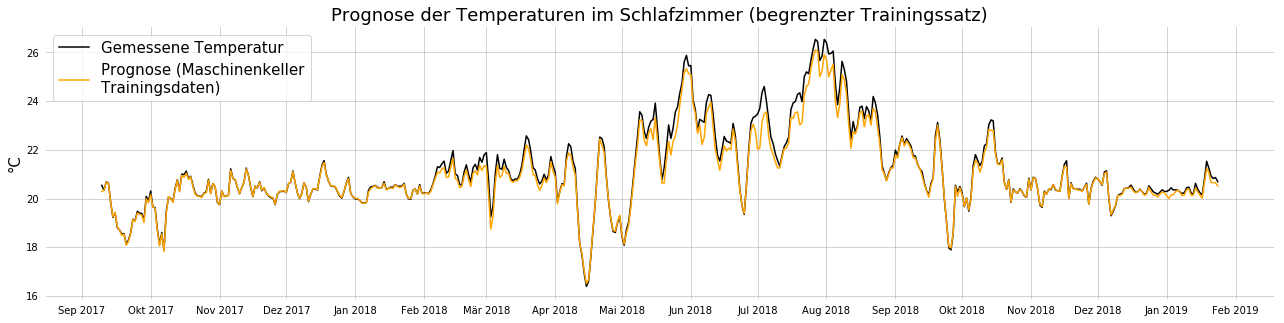

In [107]:
# Visualisieren wir das Ganze

# Erstelle 48193 Temperaturprognosen für das Schlafzimmer mit Hilfe des Modells
prognose = linreg.predict(X_test)

# Konvertiere das prognose array in das Series Format und füge einen datetime index hinzu
prognose = pd.Series(prognose)
prognose.index = df.T1.index

# Erstelle Tagesdurchschnitte zur besseren Visualisierung
Messdaten = df.groupby(df.index.date).T1.mean()
Prognose = prognose.groupby(prognose.index.date).mean()

plt.figure(figsize=(22,5))

plt.plot(np.arange(len(Messdaten)), Messdaten, c='k') # Tagestemperaturen
plt.plot(np.arange(len(Prognose)), Prognose, c='orange')
plt.xticks(positionsliste, 
           ['Sep 2017','Okt 2017','Nov 2017','Dez 2017','Jan 2018','Feb 2018','Mär 2018',
           'Apr 2018','Mai 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Okt 2018',
           'Nov 2018','Dez 2018','Jan 2019', 'Feb 2019']) # Monatsticks
plt.ylabel('°C', fontsize=15)

plt.title('Prognose der Temperaturen im Schlafzimmer (begrenzter Trainingssatz)',
         fontsize= 18)

plt.legend(loc='upper left', fontsize=15, 
           labels=['Gemessene Temperatur','Prognose (Maschinenkeller\nTrainingsdaten)'])

# Entferne den schwarzen Rahmen und mach die Grafik hübscher
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False, left=False)
plt.grid(alpha = 0.7)

plt.show()

### Wieviel besser wird die Prognosegenauigkeit, wenn wir die restlichen Zimmer für das Training des Modells hinzuziehen?

In [108]:
# Stapele die originalen 15-Minuten Daten untereinander (Und nicht die Datumdurchschnitte wie zuvor)
flur = df[['TI','RHI','DEWI']].copy()
schlafzimmer = df[['T1','RH1','DEW1']].copy()
elektrokeller = df[['T2','RH2','DEW2']].copy()
abstellkeller = df[['T3','RH3','DEW3']].copy()
maschinenkeller = df[['T4','RH4','DEW4']].copy()

# Füge jeder DataFrame eine neue Spalte mit der Zimmerbezeichnung hinzu
flur['Ort'] = 'Flur'
schlafzimmer['Ort'] = 'Schlafzimmer'
elektrokeller['Ort'] = 'Elektrokeller'
abstellkeller['Ort'] = 'Abstellkeller'
maschinenkeller['Ort'] = 'Maschinenkeller'

# Sorge dafür, dass alle Spalten in den Tabellen "Temperatur", "Feuchtigkeit", "Taupunkt" und "Ort" lauten
for matrix in [flur,schlafzimmer,elektrokeller,abstellkeller,maschinenkeller]:
    matrix.columns = ['Temperatur','Feuchtigkeit','Taupunkt','Ort']

# Stapele alle 5 DataFrames untereinander in eine einzige große Tabelle, statt nebeneinander
super_langes_df = pd.concat([flur, schlafzimmer, elektrokeller, abstellkeller, maschinenkeller], axis=0)

super_langes_df.head(4)

,Temperatur,Feuchtigkeit,Taupunkt,Ort
Timestamp,,,,
2017-09-09 18:30:00,20.0,69,14.2,Flur
2017-09-09 18:45:00,20.0,70,14.4,Flur
2017-09-09 19:00:00,20.0,69,14.2,Flur
2017-09-09 19:15:00,20.1,70,14.5,Flur


In [109]:
super_langes_df.shape

(240965, 4)

In [110]:
super_langes_df.Ort.value_counts()

Elektrokeller      48193
Abstellkeller      48193
Flur               48193
Maschinenkeller    48193
Schlafzimmer       48193
Name: Ort, dtype: int64

In [111]:
# Daten aus denen wir die Formel extrahieren:
# Taupunkt und Relative Feuchtigkeit sind die unabhängigen Variablen
X_train = super_langes_df.loc[super_langes_df.Ort != 'Schlafzimmer', ['Feuchtigkeit','Taupunkt']]
# Temperatur ist die abhängige Variable
y_train = super_langes_df[super_langes_df.Ort != 'Schlafzimmer'].Temperatur 

# Daten mit denen wir die Güte der Prognose testen. (Schlafzimmer)
# Taupunkt und Relative Feuchtigkeit sind die unabhängigen Variablen
X_test = super_langes_df.loc[super_langes_df.Ort == 'Schlafzimmer', ['Feuchtigkeit','Taupunkt']]
# Temperatur ist die abhängige Variable
y_test = super_langes_df[super_langes_df.Ort == 'Schlafzimmer'].Temperatur

linreg = LinearRegression().fit(X_train, y_train)

print('\n\n')
print('Koeffizienten des linearen Modells (Gewichte): {}'.format(linreg.coef_))
print('Achsenabschnitt oder "Grundtemperatur": {:.3f}'.format(linreg.intercept_))
print('R-Squared score (Training-set): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-Squared score (Test-set): {:.3f}'.format(linreg.score(X_test, y_test)))




Koeffizienten des linearen Modells (Gewichte): [-0.25871925  1.05596476]
Achsenabschnitt oder "Grundtemperatur": 22.956
R-Squared score (Training-set): 0.989
R-Squared score (Test-set): 0.990


## Die Nutzung aller Zimmer fürs Training hat das R-Quadrat beim Test-Set um immerhin 2,2%-Punkte verbessert.

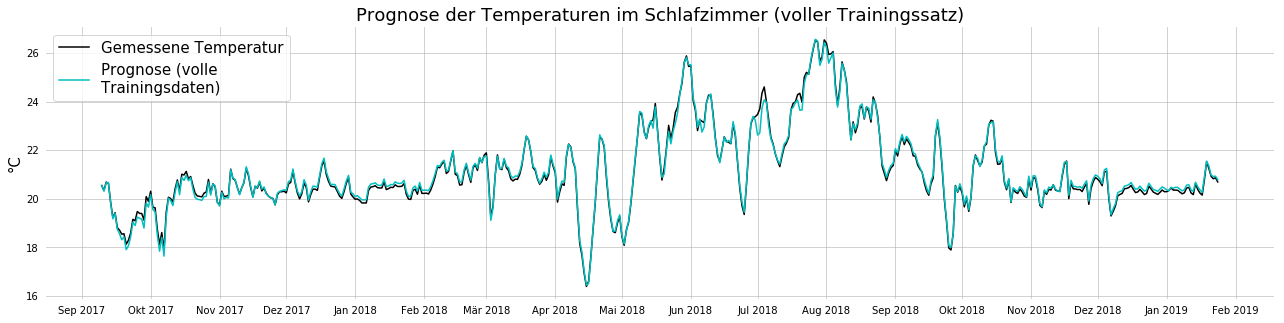

In [112]:
# Und nochmal eine Visualisierung des Ganzen

# Erstelle 48193 Temperaturprognosen für das Schlafzimmer mit Hilfe des Modells
prognose = linreg.predict(X_test)

# Konvertiere das prognose array in das Series Format und füge einen datetime index hinzu
prognose = pd.Series(prognose)
prognose.index = y_test.index

# Erstelle Tagesdurchschnitte zur besseren Visualisierung
Messdaten = y_test.groupby(y_test.index.date).mean()
Prognose = prognose.groupby(prognose.index.date).mean()

plt.figure(figsize=(22,5))

plt.plot(np.arange(len(Messdaten)), Messdaten, c='k') # Tagestemperaturen
plt.plot(np.arange(len(Prognose)), Prognose, c='c')
plt.xticks(positionsliste, 
           ['Sep 2017','Okt 2017','Nov 2017','Dez 2017','Jan 2018','Feb 2018','Mär 2018',
           'Apr 2018','Mai 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Okt 2018',
           'Nov 2018','Dez 2018','Jan 2019', 'Feb 2019']) # Monatsticks
plt.ylabel('°C', fontsize=15)

plt.title('Prognose der Temperaturen im Schlafzimmer (voller Trainingssatz)',
         fontsize= 18)

plt.legend(loc='upper left', fontsize=15, 
           labels=['Gemessene Temperatur','Prognose (volle\nTrainingsdaten)'])

# Entferne den schwarzen Rahmen und mach die Grafik hübscher
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(bottom=False, left=False)
plt.grid(alpha = 0.7)

plt.show()

#### Auch visuell können wir einen Anstieg der Prognosequalität wahrnehmen.

Die Vorhersagen können hier aus 4 Gründen niemals perfekt werden, egal wieviele Messungen wir machen würden:
1. Die Messdaten sind möglicherweise mit nur einer Nachkommastelle nicht präzise genug
2. Die Formel zur Berechnung einer Größe aus den beiden anderen (Temperatur, rel. Feuchtigkeit, Taupunkt) enthält eigentlich noch weitere Parameter wie den Luftdruck, Windgeschwindigkeit, Sonneneinstrahlung, Höhe über dem Boden. Zudem ist der Zusammenhang zwischen Temperatur und rel. Luftfeuchtigkeit nicht linear, sondern exponentionell.
3. Die 3 Zeitabschnitte, an denen nicht sauber in 15-Minütigen Intervallen gemessen wurde, werfen Fragen nach der korrekten Zuordnung von Einträgen zu Messzeitpunkten auf. Sind Timestamps und Messungen möglicherweise an wenigen Stellen "verrutscht" und haben alle darauffolgenden Reihen um die entsprechende Zeit verrückt? 
4. Möglicherweise spielt der Umstand, dass wir die 30 fehlenden Messungen aufgefüllt hatten auch eine Rolle.